# 데이터 변수 설명
- https://www.dacon.io/competitions/official/235713/talkboard/402821/

In [13]:
# 데이콘에서 제공한 baseline입니다.
# url = 'https://dacon.io/competitions/official/235713/codeshare/2475?page=1&dtype=recent'

# from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### 작명규칙: 스네이크 방식
주요 변수들은 여기에 추가해주세요.
- raw_df : 기본 트레인 테스트 모음
- pre_df : 데이터 전처리 데이터 모음

index
gender: 성별<br>
car: 차량 소유 여부<br>
reality: 부동산 소유 여부<br>
child_num: 자녀 수<br>
income_total: 연간 소득<br>
income_type: 소득 분류
							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

edu_type: 교육 수준
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

family_type: 결혼 여부
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

house_type: 생활 방식
							['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

DAYS_BIRTH: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

DAYS_EMPLOYED: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 양수 값은 고용되지 않은 상태를 의미함

FLAG_MOBIL: 핸드폰 소유 여부<br>
work_phone: 업무용 전화 소유 여부<br>
phone: 전화 소유 여부<br>
email: 이메일 소유 여부<br>
occyp_type: 직업 유형<br>												family_size: 가족 규모<br>
begin_month: 신용카드 발급 월
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미<br>
credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

## 1일차

In [4]:
url = "https://raw.githubusercontent.com/DataResolvere/Project/main/first_project/train.csv"

raw_df = pd.read_csv(url)
raw_df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [ ]:
len(raw_df.columns), raw_df.columns[1]

(20, 'gender')

In [ ]:
column_list_Category = ["gender","car","reality","income_type","edu_type","family_type","house_type",
                        "work_phone","phone","email","occyp_type","family_size"]
column_list_continuous = ["child_num","income_total","DAYS_BIRTH","DAYS_EMPLOYED","begin_month"]
column_label = "credit"

In [ ]:
len(column_list_Category), len(column_list_continuous)

(12, 5)

In [ ]:
raw_df["FLAG_MOBIL"].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

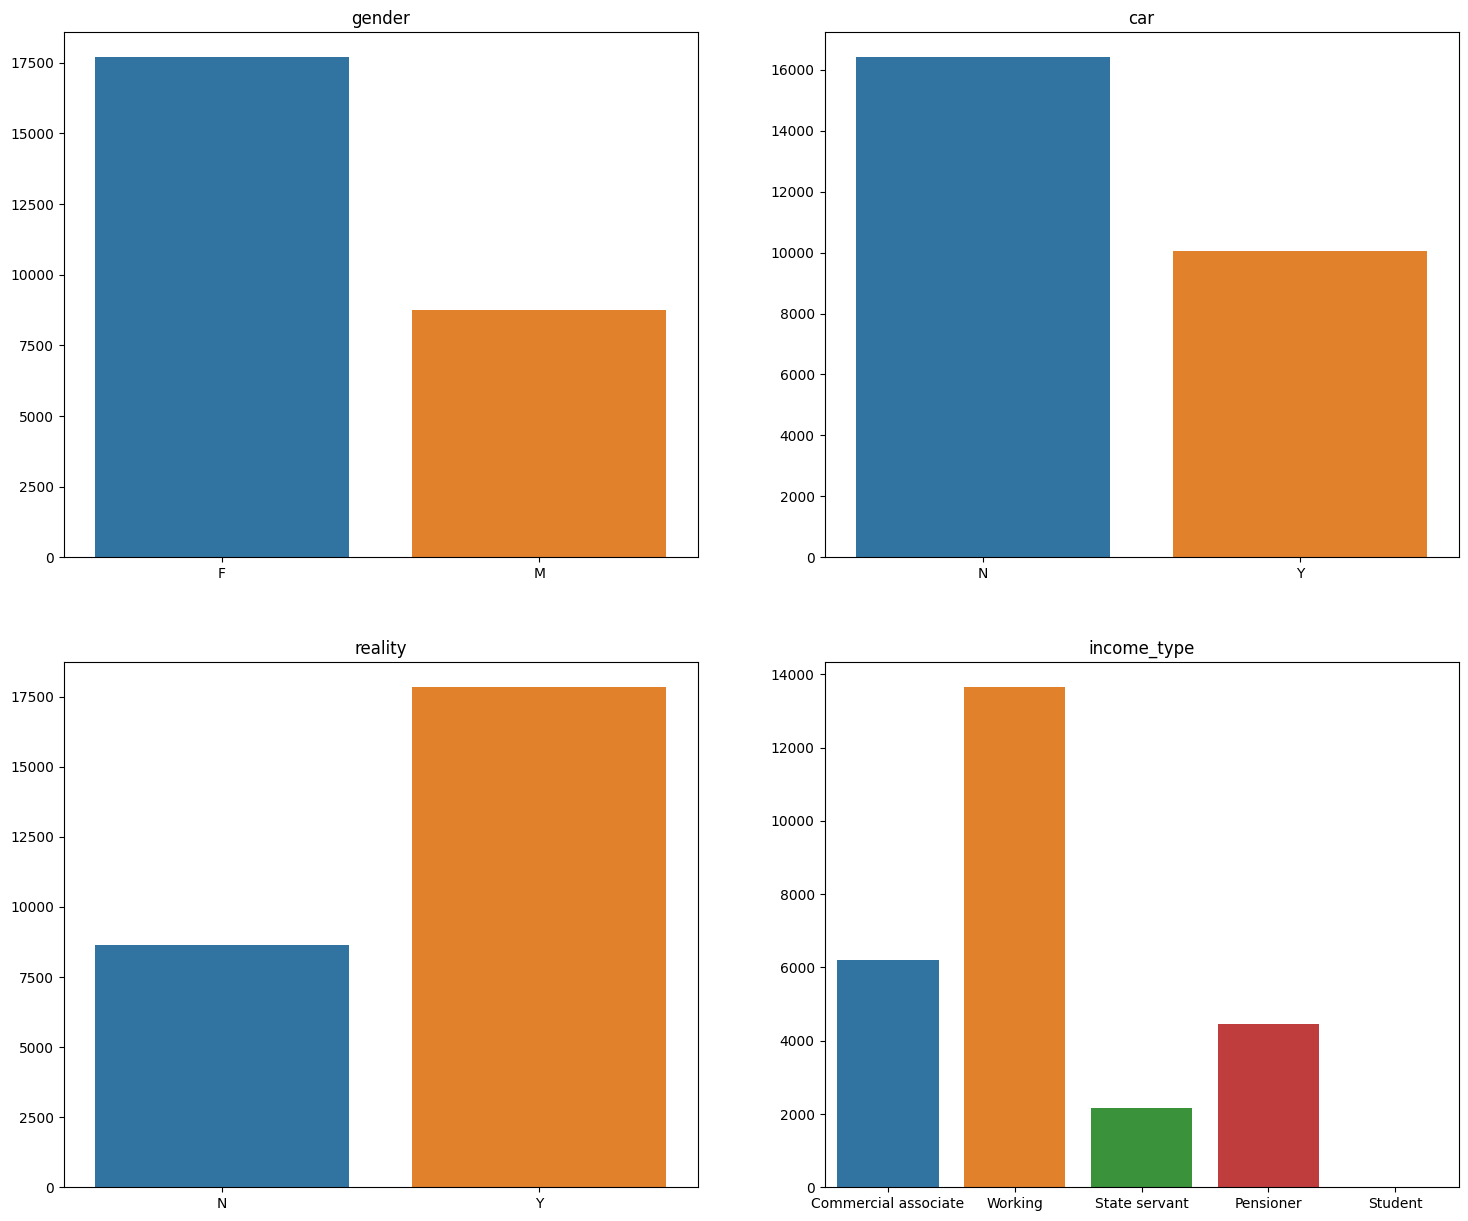

In [ ]:
plt.figure(figsize=(18,15))

for num in range(0, 4):
    plt.subplot(2,2, (num+1) )
    sns.countplot(x=raw_df[column_list_Category[num]], data = raw_df);
    plt.xlabel("")
    plt.ylabel("")
    plt.title(column_list_Category[num])

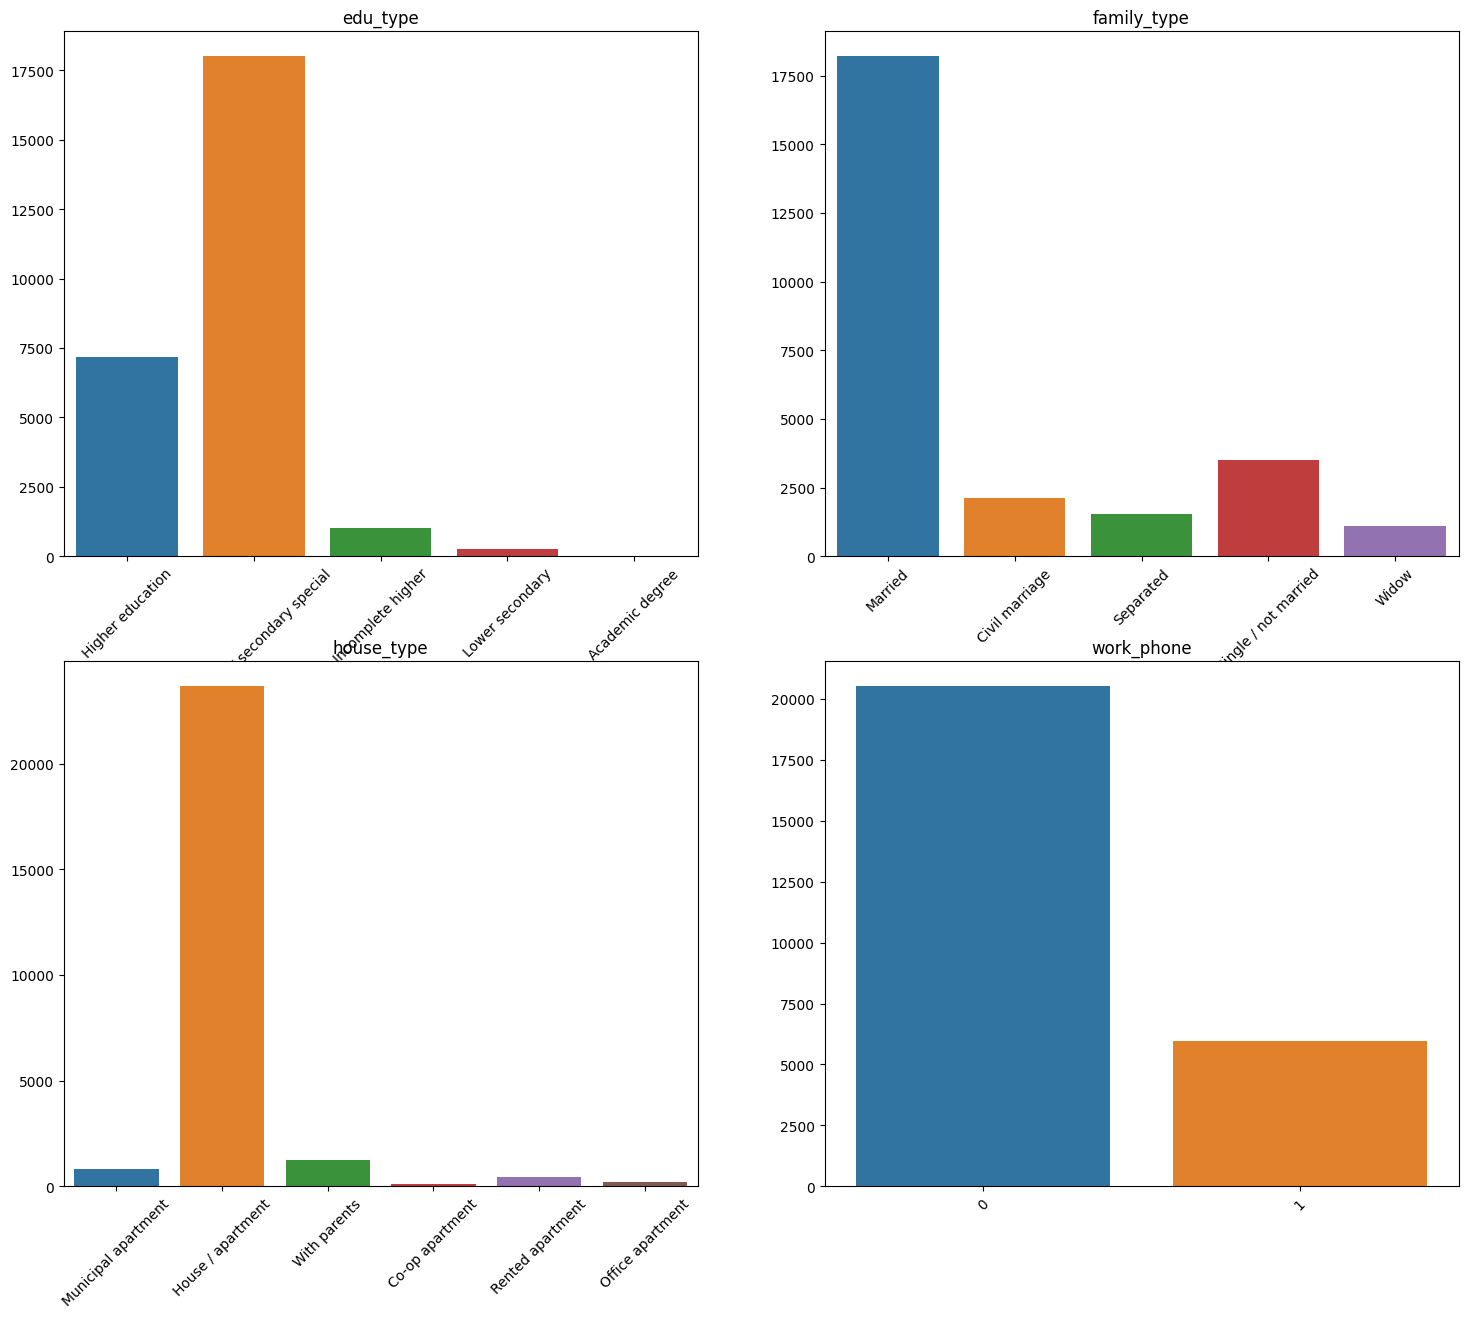

In [ ]:
plt.figure(figsize=(18,15))

for num in range(4, 8):
    plt.subplot(2,2, (num-3) )
    sns.countplot(x=raw_df[column_list_Category[num]], data = raw_df);
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(column_list_Category[num])

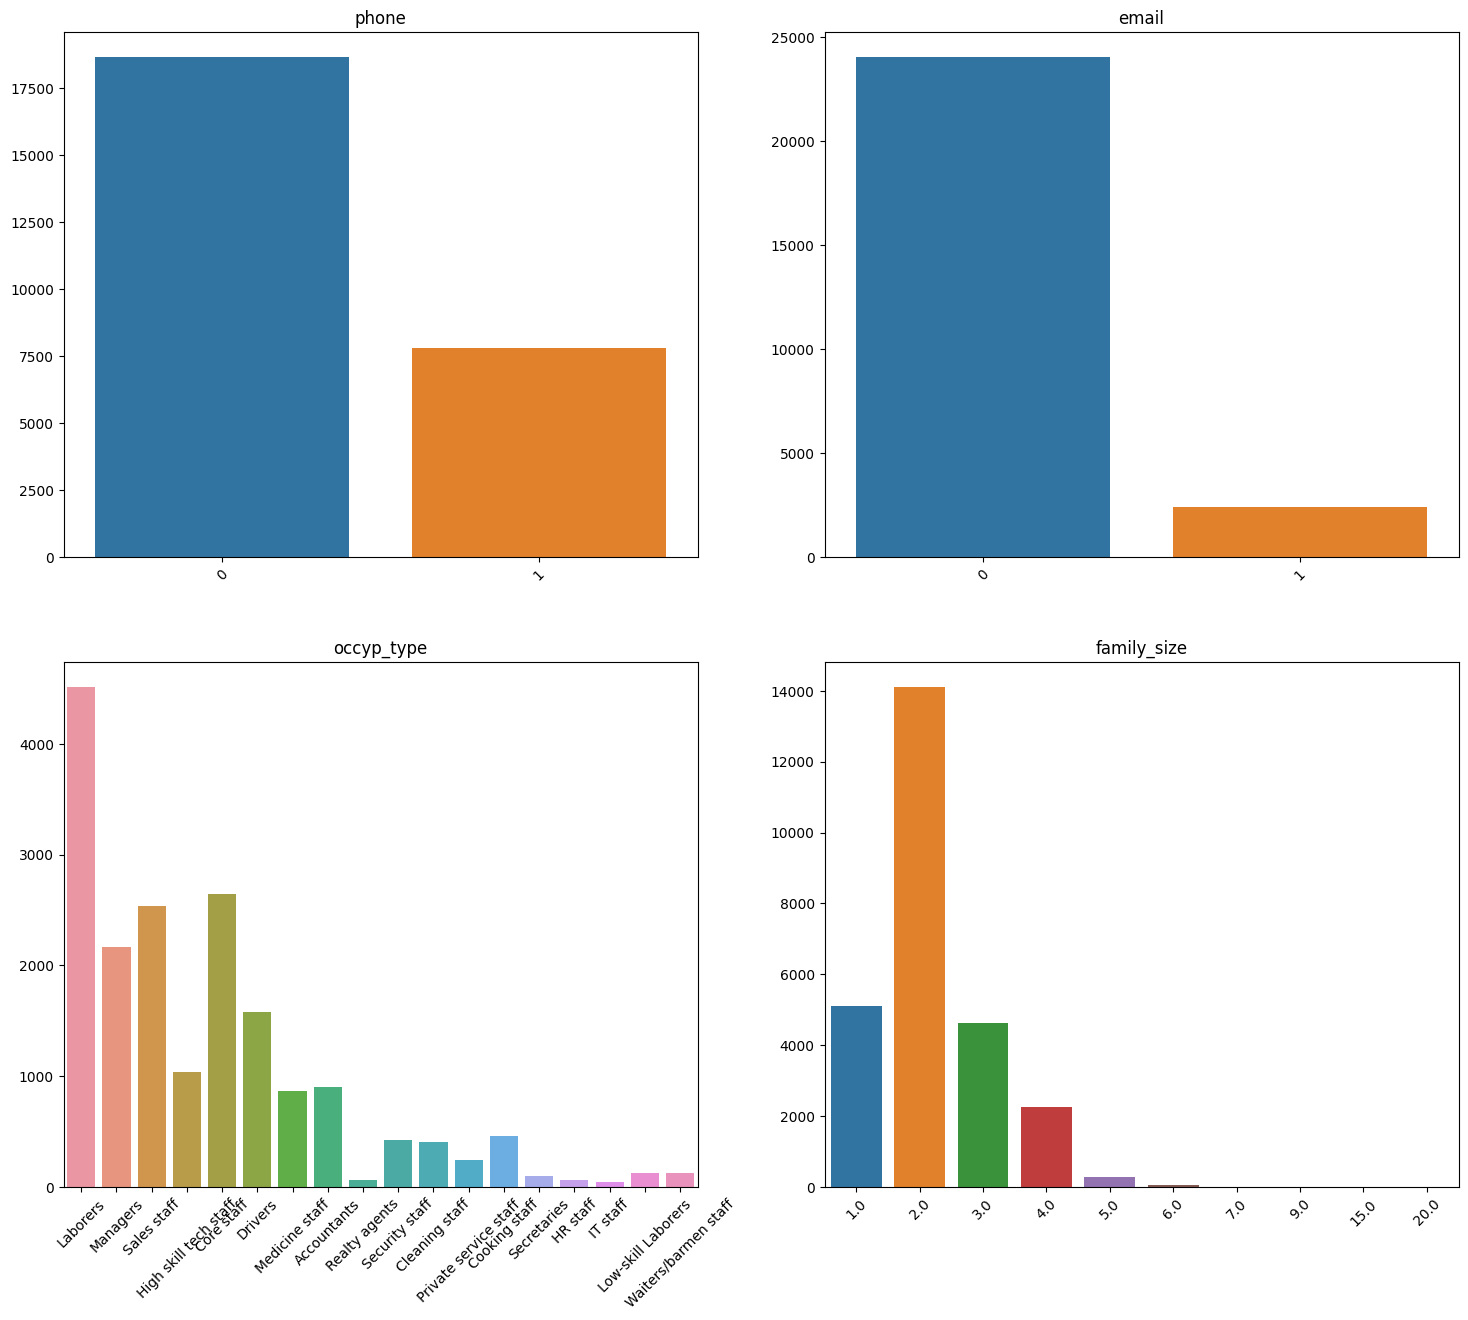

In [ ]:
plt.figure(figsize=(18,15))

for num in range(8, 12):
    plt.subplot(2,2, (num-7) )
    sns.countplot(x=raw_df[column_list_Category[num]], data = raw_df);
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(column_list_Category[num])

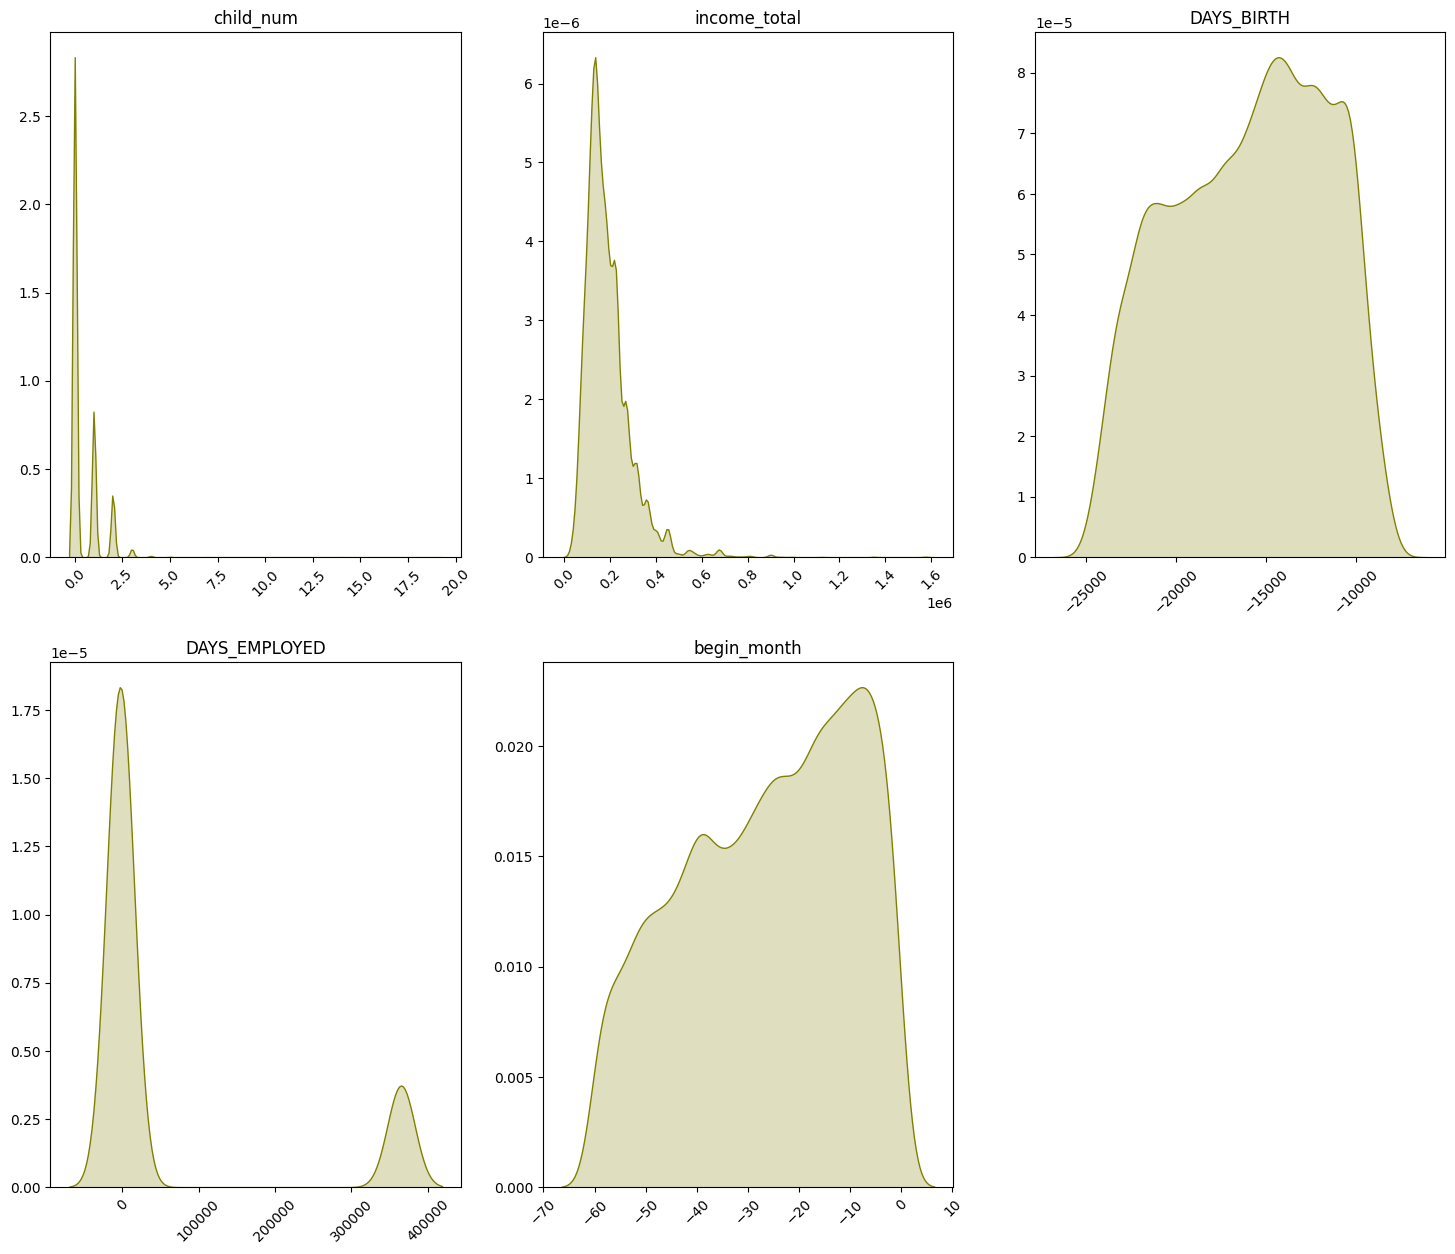

In [ ]:
plt.figure(figsize=(18,15))

for num in range(0, 5):
    plt.subplot(2,3, (num +1) )
    sns.kdeplot(raw_df[column_list_continuous[num]], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(column_list_continuous[num])

- Day_birth랑 Days_Employed는 데이터 가공이 필요해보임
- 데이터의 수치가 지난 기간을 표시하기 위해 음수로 입력되어 있어서 양수로 가공이 필요해보임

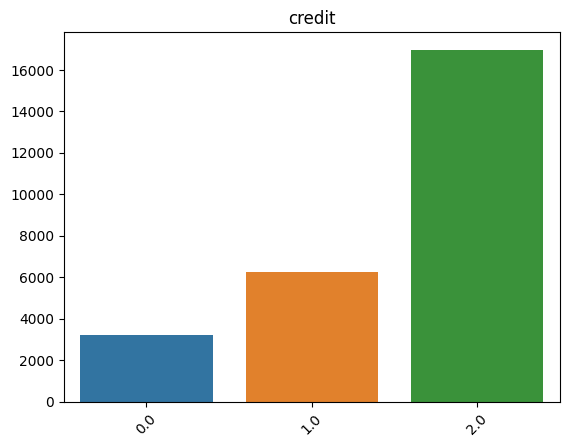

In [ ]:

sns.countplot(x=raw_df["credit"], data = raw_df);
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("")
plt.title("credit");

## 2일차

In [ ]:
raw_df # 0행에서 보면 DAYS_EMPLOYED 값이 음수라서 취업은 했지만, occyp_type이 NaN이라는 것은 직업의 항목을 정하지 못한 것으로 판단, 그렇기에 기타 직업도 하나의 데이터군으로 사용

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [ ]:
pre_data = raw_df
pre_data = pre_data.drop(["FLAG_MOBIL", "index"], axis=1)
pre_data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0


- 전처리 필요한 데이터 : income_total, DAYS_BIRTH, DAYS_EMPLOYED, occyp_type(nan 값은 기타로 파악), begin_month

In [ ]:
pre_data.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

In [ ]:
for name in pre_data.columns:
  if len(pre_data[pre_data[name].isna( )]) > 0:
    print(name, " : Nan value")

occyp_type  : Nan value


In [ ]:
pre_data["occyp_type"].value_counts().sum(), pre_data["reality"].value_counts().sum()

(18286, 26457)

In [ ]:
pre_data.fillna("etc", inplace=True)

In [ ]:
pre_data.loc[pre_data['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0 

In [ ]:
pre_data["DAYS_EMPLOYED"] = pre_data["DAYS_EMPLOYED"].abs()
pre_data["DAYS_BIRTH"] = pre_data["DAYS_BIRTH"].abs()
pre_data["begin_month"] = pre_data["begin_month"].abs()

In [ ]:
pre_data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4.0,2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,etc,2.0,47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2.0,25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1.0,59.0,2.0


In [ ]:
hist, bins = np.histogram(pre_data["income_total"], 8)
bins_name = [i for i in range(8)]
pre_data["income_total"] = pd.cut(x=pre_data["income_total"], bins=bins, labels=bins_name, include_lowest=True)

hist, bins = np.histogram(pre_data["DAYS_BIRTH"], 8)
bins_name = [i for i in range(8)]
pre_data["DAYS_BIRTH"] = pd.cut(x=pre_data["DAYS_BIRTH"], bins=bins, labels=bins_name, include_lowest=True)

hist, bins = np.histogram(pre_data["DAYS_EMPLOYED"], 8)
bins_name = [i for i in range(8)]
pre_data["DAYS_EMPLOYED"] = pd.cut(x=pre_data["DAYS_EMPLOYED"], bins=bins, labels=bins_name, include_lowest=True)

hist, bins = np.histogram(pre_data["begin_month"], 8)
bins_name = [i for i in range(8)]
pre_data["begin_month"] = pd.cut(x=pre_data["begin_month"], bins=bins, labels=bins_name, include_lowest=True)

In [ ]:
pre_data["family_size"] = pre_data["family_size"].astype("int") 
pre_data["credit"] = pre_data["credit"].astype("int") 

In [ ]:
pre_data["gender"] = pre_data["gender"].apply(lambda x: 0 if x == "F" else 1)
pre_data["car"] = pre_data["car"].apply(lambda x: 0 if x == "N" else 1)
pre_data["reality"] = pre_data["reality"].apply(lambda x: 0 if x == "N" else 1)

In [ ]:
pre_data["gender"].value_counts()

0    17697
1     8760
Name: gender, dtype: int64

In [ ]:
pre_data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,Commercial associate,Higher education,Married,Municipal apartment,2,2,0,0,0,etc,2,0,1
1,0,0,1,1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,1,Laborers,3,0,1
2,1,1,1,0,2,Working,Higher education,Married,House / apartment,5,2,0,1,0,Managers,2,2,2
3,0,0,1,0,0,Commercial associate,Secondary / secondary special,Married,House / apartment,3,1,0,1,0,Sales staff,2,4,0
4,0,1,1,0,0,State servant,Higher education,Married,House / apartment,3,1,0,0,0,Managers,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,1,State servant,Secondary / secondary special,Married,House / apartment,2,1,0,0,0,Core staff,4,0,1
26453,0,0,1,1,0,Working,Higher education,Separated,House / apartment,3,1,0,0,0,etc,2,6,2
26454,0,1,0,0,1,Working,Secondary / secondary special,Civil marriage,With parents,1,1,0,0,0,Core staff,2,3,2
26455,1,0,1,0,0,Working,Incomplete higher,Single / not married,House / apartment,1,0,0,0,0,Laborers,1,7,2


In [ ]:
x = pre_data.iloc[:, :-1]
y = pre_data[["credit"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21165, 17), (5292, 17), (21165, 1), (5292, 1))

In [ ]:
x_train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
6890,0,0,0,0,0,Pensioner,Secondary / secondary special,Married,Municipal apartment,4,0,0,0,1,etc,2,3
4217,0,0,1,0,0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,0,High skill tech staff,1,1
6716,0,0,0,1,1,Working,Incomplete higher,Married,With parents,3,3,0,0,0,Accountants,3,5
19124,0,0,1,0,0,Pensioner,Secondary / secondary special,Married,House / apartment,6,0,0,0,0,etc,2,6
21489,0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,3,2,0,0,0,Laborers,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,1,0,etc,3,7
24080,1,1,0,0,0,Commercial associate,Higher education,Married,House / apartment,0,0,0,0,0,Laborers,2,0
74,0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,1,0,Sales staff,3,3
14512,1,0,1,1,1,Working,Higher education,Married,House / apartment,1,0,0,0,0,Managers,3,6


In [ ]:
make_label = LabelEncoder()

x_train["income_type"] = make_label.fit_transform(x_train["income_type"])
x_test["income_type"] = make_label.transform(x_test["income_type"])

x_train["edu_type"] = make_label.fit_transform(x_train["edu_type"])
x_test["edu_type"] = make_label.transform(x_test["edu_type"])

x_train["family_type"] = make_label.fit_transform(x_train["family_type"])
x_test["family_type"] = make_label.transform(x_test["family_type"])

x_train["house_type"] = make_label.fit_transform(x_train["house_type"])
x_test["house_type"] = make_label.transform(x_test["house_type"])

x_train["occyp_type"] = make_label.fit_transform(x_train["occyp_type"])
x_test["occyp_type"] = make_label.transform(x_test["occyp_type"])

In [ ]:
x_train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
6890,0,0,0,0,0,1,4,1,2,4,0,0,0,1,18,2,3
4217,0,0,1,0,0,4,1,3,1,1,0,0,0,0,6,1,1
6716,0,0,0,1,1,4,2,1,5,3,3,0,0,0,0,3,5
19124,0,0,1,0,0,1,4,1,1,6,0,0,0,0,18,2,6
21489,0,0,1,1,0,4,4,1,1,3,2,0,0,0,8,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0,0,1,1,0,4,4,1,1,1,0,1,1,0,18,3,7
24080,1,1,0,0,0,0,1,1,1,0,0,0,0,0,8,2,0
74,0,0,1,1,0,4,4,1,1,1,0,1,1,0,14,3,3
14512,1,0,1,1,1,4,1,1,1,1,0,0,0,0,10,3,6


In [ ]:
x_test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
1799,0,0,0,1,0,0,2,1,5,1,1,0,0,0,18,3,5
251,0,0,0,0,0,1,4,1,1,5,0,0,1,0,18,2,1
9483,0,0,1,0,1,1,4,4,1,7,0,0,0,0,18,1,0
4865,0,0,0,0,0,4,1,2,1,6,0,0,0,0,3,1,1
25663,0,0,1,1,0,4,1,2,1,3,0,0,0,0,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19273,0,0,1,0,1,0,2,0,1,0,0,0,1,0,14,2,0
24417,1,1,0,0,1,2,1,1,2,1,1,0,0,0,3,2,4
21822,1,0,1,0,0,4,4,1,1,0,0,0,1,0,8,2,2
18221,1,0,1,0,1,4,4,1,1,4,0,0,0,0,8,2,0


In [ ]:
rf_clf = RandomForestClassifier()

params = {
    "n_estimators" : [10, 50, 100, 500, 1000],
    "random_state" : [13]}
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
gridCv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy')

In [ ]:
gridCv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 500, 1000],
                         'random_state': [13]},
             scoring='accuracy')

In [ ]:
gridCv.best_score_, gridCv.best_estimator_

(0.6647767540751242,
 RandomForestClassifier(n_estimators=1000, random_state=13))

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=50, random_state=13)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)

In [ ]:
accuracy_score(y_test, pred)

0.6651549508692366

In [ ]:
rf_clf = RandomForestClassifier()
params = {
    "n_estimators" : [10, 50, 100, 500, 1000],
    "random_state" : [13]}
cv = StratifiedKFold(n_splits=5, shuffle=True)
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
clf = GridSearchCV(rf_clf, param_grid=params, cv=cv, scoring=LogLoss)
clf.fit(x_train, y_train)

print(clf.best_score_, clf.best_estimator_)

-0.9213988058162192 RandomForestClassifier(n_estimators=1000, random_state=13)


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000)

rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
from pandas.core.frame import to_arrays
from numpy.ma.core import log
pred = rf_clf.predict_proba(x_test)

log_loss(y_test, pred)

0.9559166069875962

In [ ]:
pred.shape, y_test.shape

NameError: ignored

## 3일차, 전처리 재시작

In [5]:
pre_2_data = raw_df
pre_2_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [15]:
pre_2_data["gender"] = pre_2_data["gender"].apply(lambda x: 0 if x == "F" else 1)
pre_2_data["car"] = pre_2_data["car"].apply(lambda x: 0 if x == "N" else 1)
pre_2_data["reality"] = pre_2_data["reality"].apply(lambda x: 0 if x == "N" else 1)

In [16]:
pre_2_data.fillna("etc", inplace=True)
pre_2_data.loc[pre_2_data['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
pre_2_data = pre_2_data.drop(["FLAG_MOBIL"], axis=1)

KeyError: "['FLAG_MOBIL'] not found in axis"

In [17]:
pre_2_data["DAYS_EMPLOYED"] = pre_2_data["DAYS_EMPLOYED"].abs()
pre_2_data["DAYS_BIRTH"] = pre_2_data["DAYS_BIRTH"].abs()
pre_2_data["begin_month"] = pre_2_data["begin_month"].abs()
pre_2_data["family_size"] = pre_2_data["family_size"].astype("int") 
pre_2_data["credit"] = pre_2_data["credit"].astype("int") 

In [18]:
pre_2_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,1,1,1,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,0,0,0,0,etc,2,6.0,1
1,1,1,1,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,0,0,0,1,Laborers,3,5.0,1
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,0,0,1,0,Managers,2,22.0,2
3,3,1,1,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,0,0,1,0,Sales staff,2,37.0,0
4,4,1,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,0,0,0,0,Managers,2,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,1,1,1,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,0,0,0,0,Core staff,4,2.0,1
26453,26453,1,1,1,1,180000.0,Working,Higher education,Separated,House / apartment,15291,0,0,0,0,etc,2,47.0,2
26454,26454,1,1,1,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,0,0,0,0,Core staff,2,25.0,2
26455,26455,1,1,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,0,0,0,0,Laborers,1,59.0,2


In [9]:
pre_2_data.corr().sort_values(by="credit")

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
reality,0.006645,-0.048927,-0.016599,1.000000,0.000435,0.035377,0.130241,-0.038546,-0.208648,-0.065553,0.051085,-0.006667,-0.003863,-0.009387
index,1.000000,-0.006261,0.004210,0.006645,0.001012,0.009848,0.008901,-0.000410,-0.005575,-0.001790,0.005332,-0.002867,-0.002181,-0.007841
work_phone,-0.005575,0.064316,0.026124,-0.208648,0.051521,-0.034207,-0.178752,0.108538,1.000000,0.310256,-0.031048,0.068705,0.008563,-0.003134
gender,-0.006261,1.000000,0.362320,-0.048927,0.076731,0.198455,-0.201138,-0.033930,0.064316,-0.027078,0.000108,0.111060,-0.007707,0.001562
phone,-0.001790,-0.027078,-0.013730,-0.065553,-0.010555,0.019013,0.029247,0.041886,0.310256,1.000000,0.012494,-0.000132,0.014286,0.003452
child_num,0.001012,0.076731,0.101846,0.000435,1.000000,0.032186,-0.332816,0.043122,0.051521,-0.010555,0.016120,0.890530,0.007229,0.004081
car,0.004210,0.362320,1.000000,-0.016599,0.101846,0.213432,-0.156883,0.004348,0.026124,-0.013730,0.018904,0.149463,0.029955,0.007761
family_size,-0.002867,0.111060,0.149463,-0.006667,0.890530,0.023839,-0.298108,0.055657,0.068705,-0.000132,0.016122,1.000000,0.023032,0.008227
income_total,0.009848,0.198455,0.213432,0.035377,0.032186,1.000000,-0.064155,0.086899,-0.034207,0.019013,0.089882,0.023839,0.018047,0.008555
email,0.005332,0.000108,0.018904,0.051085,0.016120,0.089882,-0.111238,0.002904,-0.031048,0.012494,1.000000,0.016122,-0.002320,0.014812


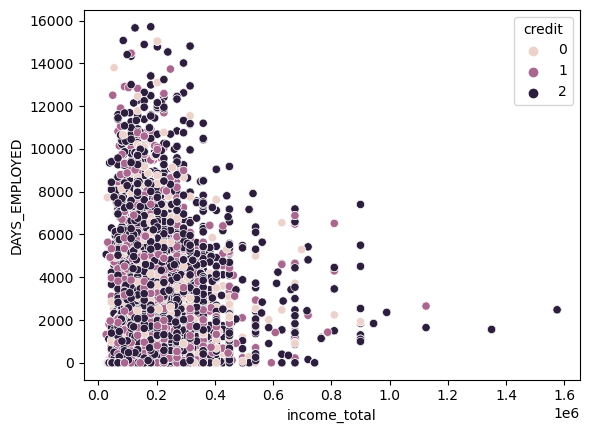

In [10]:
sns.scatterplot(data=pre_2_data, x="income_total", y="DAYS_EMPLOYED", hue="credit");

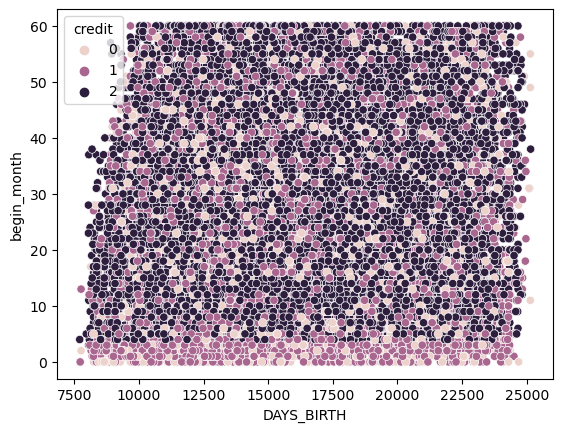

In [11]:
sns.scatterplot(data=pre_2_data, x="DAYS_BIRTH", y="begin_month", hue="credit");

- 2가지 방법이 생각남
> 1. Principal 기법을 사용할 경우 범주형 자료와 연속형 자료가 혼합되어 있기 때문에 좋은 방법이 아니라서 from factor_analyzer import FactorAnalyzer 모듈을 통해 요인분석을 해보고 feature을 선택
> 2. 상관계수 확인 결과 연속형 자료가 credit과 상대적으로 높은 연관성을 가지고 있기에 해당 연속형 자료를 통해 OLS를 실시

In [ ]:
#!pip install factor_analyzer

  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=5ef5d85d38af610fec706b81b112fb543d30d43916bb02e8da1f51bd1c1c0fae
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [19]:
make_label = LabelEncoder()

pre_2_data["income_type"] = make_label.fit_transform(pre_2_data["income_type"])
pre_2_data["edu_type"] = make_label.fit_transform(pre_2_data["edu_type"])
pre_2_data["family_type"] = make_label.fit_transform(pre_2_data["family_type"])
pre_2_data["house_type"] = make_label.fit_transform(pre_2_data["house_type"])
pre_2_data["occyp_type"] = make_label.fit_transform(pre_2_data["occyp_type"])

In [13]:
pre_2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  int64  
 2   car            26457 non-null  int64  
 3   reality        26457 non-null  int64  
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  int32  
 7   edu_type       26457 non-null  int32  
 8   family_type    26457 non-null  int32  
 9   house_type     26457 non-null  int32  
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     26457 non-null  int32  
 16  family_size    26457 non-null  int32  
 17  begin_month    26457 non-null  float64
 18  credit

In [14]:
pre_2_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,18,2,6.0,1
1,1,0,0,1,1,247500.0,0,4,0,1,11380,1540,0,0,1,8,3,5.0,1
2,2,1,1,1,0,450000.0,4,1,1,1,19087,4434,0,1,0,10,2,22.0,2
3,3,0,0,1,0,202500.0,0,4,1,1,15088,2092,0,1,0,14,2,37.0,0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,2105,0,0,0,10,2,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,12079,1984,0,0,0,3,4,2.0,1
26453,26453,0,0,1,1,180000.0,4,1,2,1,15291,2475,0,0,0,18,2,47.0,2
26454,26454,0,1,0,0,292500.0,4,4,0,5,10082,2015,0,0,0,3,2,25.0,2
26455,26455,1,0,1,0,171000.0,4,2,3,1,10145,107,0,0,0,8,1,59.0,2


In [ ]:
x = pre_2_data[["begin_month", "DAYS_BIRTH", "DAYS_EMPLOYED", "income_total", "edu_type"]]
y = pre_2_data[["credit"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.2)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=13)

rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=13)

In [ ]:
pred = rf_clf.predict_proba(x_test)
log_loss(y_test, pred)

0.7728756099186546

In [ ]:
pred = rf_clf.predict(x_test)

accuracy_score(y_test, pred)

0.7018140589569161

In [ ]:
tr_clf = DecisionTreeClassifier(random_state=13, max_depth=5)
tr_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [ ]:
pred = tr_clf.predict_proba(x_test)

log_loss(y_test, pred)

0.8287675330211531

In [ ]:
pred = tr_clf.predict(x_test)

accuracy_score(y_test, pred)

0.6940665154950869

In [ ]:
x["DAYS_EMPLOYED"].value_counts()

0        4438
401        57
1539       47
200        45
2087       44
         ... 
10475       1
2202        1
2552        1
680         1
4973        1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

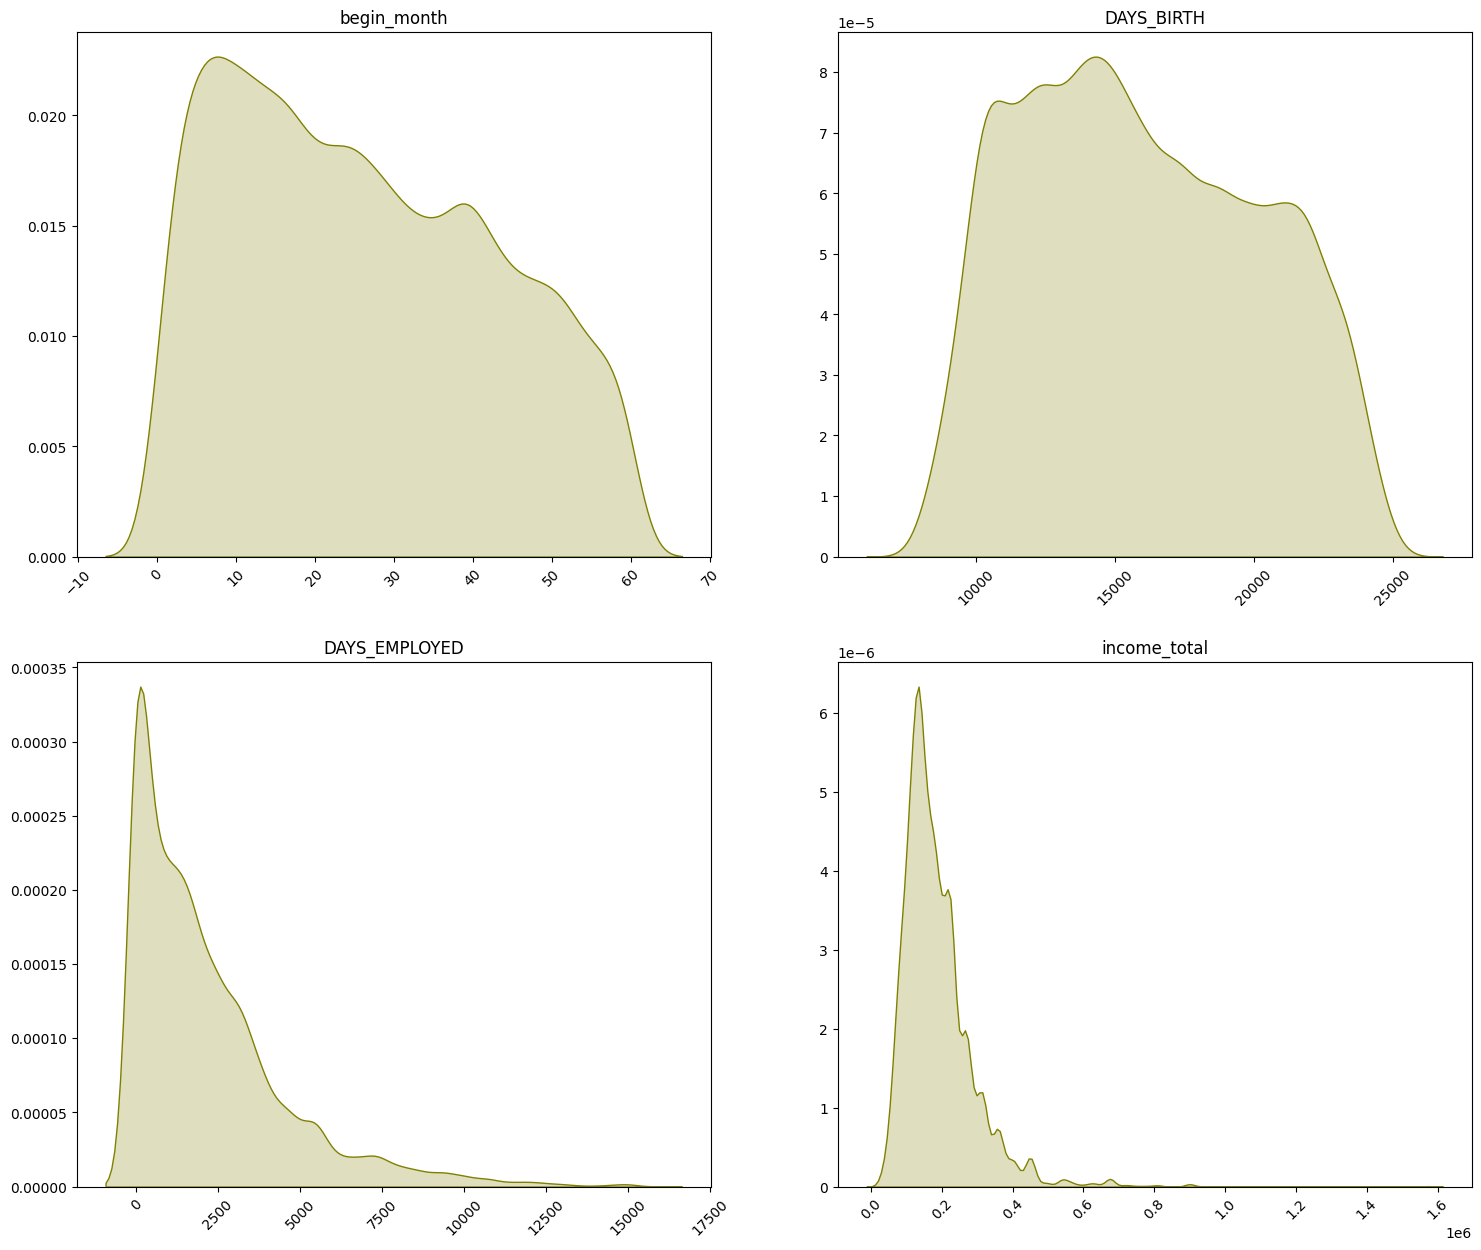

In [ ]:
plt.figure(figsize=(18,15))
column_list_continuous = ["begin_month","DAYS_BIRTH","DAYS_EMPLOYED","income_total"]

for num in range(0, 4):
    plt.subplot(2,2, (num +1) )
    sns.kdeplot(x[column_list_continuous[num]], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(column_list_continuous[num])

## 4일차, 함수 생성 및 성능 테스트
- 머신러닝 모델링 기법으로 Randomforest, xgboost, catboost, VotingClassifier  4개를 사용할 예정
- 반복적인 분석 및 전처리 자료를 성능 테스트 하기 위해 함수 생성

In [20]:
pre_data = pre_2_data
pre_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,1,1,1,0,202500.0,0,1,1,2,13899,0,0,0,0,18,2,6.0,1
1,1,1,1,1,1,247500.0,0,4,0,1,11380,0,0,0,1,8,3,5.0,1
2,2,1,1,1,0,450000.0,4,1,1,1,19087,0,0,1,0,10,2,22.0,2
3,3,1,1,1,0,202500.0,0,4,1,1,15088,0,0,1,0,14,2,37.0,0
4,4,1,1,1,0,157500.0,2,1,1,1,15037,0,0,0,0,10,2,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,1,1,1,2,225000.0,2,4,1,1,12079,0,0,0,0,3,4,2.0,1
26453,26453,1,1,1,1,180000.0,4,1,2,1,15291,0,0,0,0,18,2,47.0,2
26454,26454,1,1,1,0,292500.0,4,4,0,5,10082,0,0,0,0,3,2,25.0,2
26455,26455,1,1,1,0,171000.0,4,2,3,1,10145,0,0,0,0,8,1,59.0,2


In [16]:
x = pre_data[["begin_month", "DAYS_BIRTH", "DAYS_EMPLOYED", "income_total", "edu_type"]]
y = pre_data[["credit"]]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.2)

In [32]:
m_clf = RandomForestClassifier()
params = {
    "n_estimators" : [500, 1000],
    "random_state" : [13]}
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
clf = GridSearchCV(m_clf, param_grid=params, cv=2, scoring="neg_log_loss")
clf.fit(x_train, y_train)

print(clf.best_score_, clf.best_estimator_)

-0.8005953122895666 RandomForestClassifier(n_estimators=1000, random_state=13)


In [50]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(x_train, y_train, 
        eval_set=(x_test, y_test), 
        verbose=False
)
pred = clf.predict_proba(x_test)
log_loss(y_test, pred)

0.9142421196970971

In [57]:
cat = CatBoostClassifier()
params = {'depth' : [3, 5, 7, 9],
          'learning_rate' : [0.01,0.04],
          'iterations'    : [10, 50, 100]
                 
}
clf = GridSearchCV(cat, param_grid=params, cv=2, scoring="neg_log_loss")
clf.fit(x_train, y_train)

pred = clf.predict_proba(x_test)
print("cat_best : ",clf.best_estimator_)
print("cat_result : ",log_loss(y_test, pred))

0:	learn: 1.0927406	total: 6.94ms	remaining: 62.5ms
1:	learn: 1.0870148	total: 13.2ms	remaining: 53ms
2:	learn: 1.0814767	total: 17.7ms	remaining: 41.3ms
3:	learn: 1.0760312	total: 22.1ms	remaining: 33.2ms
4:	learn: 1.0707514	total: 27.2ms	remaining: 27.2ms
5:	learn: 1.0655964	total: 32ms	remaining: 21.4ms
6:	learn: 1.0605133	total: 37.5ms	remaining: 16.1ms
7:	learn: 1.0555472	total: 42.9ms	remaining: 10.7ms
8:	learn: 1.0506304	total: 48.2ms	remaining: 5.35ms
9:	learn: 1.0461044	total: 53.1ms	remaining: 0us
0:	learn: 1.0927835	total: 5.45ms	remaining: 49ms
1:	learn: 1.0870995	total: 11.1ms	remaining: 44.5ms
2:	learn: 1.0816541	total: 16.5ms	remaining: 38.5ms
3:	learn: 1.0762372	total: 21.8ms	remaining: 32.7ms
4:	learn: 1.0710477	total: 27ms	remaining: 27ms
5:	learn: 1.0658762	total: 32.2ms	remaining: 21.5ms
6:	learn: 1.0608236	total: 37ms	remaining: 15.9ms
7:	learn: 1.0558974	total: 42ms	remaining: 10.5ms
8:	learn: 1.0510398	total: 47.3ms	remaining: 5.26ms
9:	learn: 1.0466209	total: 52

0:	learn: 1.0756488	total: 5.34ms	remaining: 262ms
1:	learn: 1.0548697	total: 10.8ms	remaining: 258ms
2:	learn: 1.0363009	total: 15.2ms	remaining: 238ms
3:	learn: 1.0190613	total: 20ms	remaining: 230ms
4:	learn: 1.0036206	total: 24.8ms	remaining: 223ms
5:	learn: 0.9895386	total: 29.1ms	remaining: 214ms
6:	learn: 0.9762417	total: 33.6ms	remaining: 207ms
7:	learn: 0.9640622	total: 38.1ms	remaining: 200ms
8:	learn: 0.9527463	total: 43ms	remaining: 196ms
9:	learn: 0.9431511	total: 47.6ms	remaining: 191ms
10:	learn: 0.9335795	total: 52.2ms	remaining: 185ms
11:	learn: 0.9246547	total: 56.8ms	remaining: 180ms
12:	learn: 0.9167293	total: 61.2ms	remaining: 174ms
13:	learn: 0.9094388	total: 66ms	remaining: 170ms
14:	learn: 0.9027255	total: 70.4ms	remaining: 164ms
15:	learn: 0.8961245	total: 75.2ms	remaining: 160ms
16:	learn: 0.8900176	total: 79.7ms	remaining: 155ms
17:	learn: 0.8844038	total: 84.1ms	remaining: 150ms
18:	learn: 0.8792060	total: 89.2ms	remaining: 146ms
19:	learn: 0.8743567	total: 

43:	learn: 0.9356709	total: 193ms	remaining: 246ms
44:	learn: 0.9333708	total: 198ms	remaining: 242ms
45:	learn: 0.9311199	total: 203ms	remaining: 238ms
46:	learn: 0.9289190	total: 207ms	remaining: 233ms
47:	learn: 0.9269421	total: 211ms	remaining: 229ms
48:	learn: 0.9248150	total: 215ms	remaining: 224ms
49:	learn: 0.9227402	total: 220ms	remaining: 220ms
50:	learn: 0.9206816	total: 224ms	remaining: 215ms
51:	learn: 0.9187593	total: 229ms	remaining: 211ms
52:	learn: 0.9168792	total: 233ms	remaining: 206ms
53:	learn: 0.9149483	total: 237ms	remaining: 202ms
54:	learn: 0.9130570	total: 241ms	remaining: 198ms
55:	learn: 0.9112852	total: 245ms	remaining: 193ms
56:	learn: 0.9095471	total: 250ms	remaining: 188ms
57:	learn: 0.9077527	total: 254ms	remaining: 184ms
58:	learn: 0.9059998	total: 258ms	remaining: 179ms
59:	learn: 0.9043545	total: 263ms	remaining: 175ms
60:	learn: 0.9026634	total: 267ms	remaining: 171ms
61:	learn: 0.9010070	total: 272ms	remaining: 167ms
62:	learn: 0.8993739	total: 276

45:	learn: 0.8213643	total: 197ms	remaining: 232ms
46:	learn: 0.8207234	total: 203ms	remaining: 229ms
47:	learn: 0.8201721	total: 208ms	remaining: 225ms
48:	learn: 0.8193567	total: 212ms	remaining: 221ms
49:	learn: 0.8188756	total: 216ms	remaining: 216ms
50:	learn: 0.8181892	total: 220ms	remaining: 211ms
51:	learn: 0.8175708	total: 224ms	remaining: 206ms
52:	learn: 0.8169675	total: 228ms	remaining: 202ms
53:	learn: 0.8163884	total: 232ms	remaining: 198ms
54:	learn: 0.8159071	total: 236ms	remaining: 193ms
55:	learn: 0.8155406	total: 240ms	remaining: 188ms
56:	learn: 0.8152327	total: 244ms	remaining: 184ms
57:	learn: 0.8147573	total: 248ms	remaining: 180ms
58:	learn: 0.8143889	total: 253ms	remaining: 176ms
59:	learn: 0.8141153	total: 257ms	remaining: 171ms
60:	learn: 0.8138740	total: 261ms	remaining: 167ms
61:	learn: 0.8136321	total: 265ms	remaining: 163ms
62:	learn: 0.8132602	total: 270ms	remaining: 158ms
63:	learn: 0.8129231	total: 275ms	remaining: 155ms
64:	learn: 0.8126759	total: 279

31:	learn: 0.9659054	total: 213ms	remaining: 120ms
32:	learn: 0.9632183	total: 219ms	remaining: 113ms
33:	learn: 0.9603722	total: 224ms	remaining: 106ms
34:	learn: 0.9575913	total: 230ms	remaining: 98.7ms
35:	learn: 0.9548440	total: 236ms	remaining: 91.8ms
36:	learn: 0.9522330	total: 243ms	remaining: 85.2ms
37:	learn: 0.9496875	total: 248ms	remaining: 78.3ms
38:	learn: 0.9471927	total: 253ms	remaining: 71.5ms
39:	learn: 0.9448457	total: 260ms	remaining: 64.9ms
40:	learn: 0.9424341	total: 266ms	remaining: 58.4ms
41:	learn: 0.9401861	total: 273ms	remaining: 52ms
42:	learn: 0.9377968	total: 280ms	remaining: 45.5ms
43:	learn: 0.9355470	total: 285ms	remaining: 38.9ms
44:	learn: 0.9332351	total: 291ms	remaining: 32.3ms
45:	learn: 0.9310640	total: 298ms	remaining: 25.9ms
46:	learn: 0.9288394	total: 304ms	remaining: 19.4ms
47:	learn: 0.9266724	total: 308ms	remaining: 12.8ms
48:	learn: 0.9245538	total: 313ms	remaining: 6.4ms
49:	learn: 0.9224471	total: 320ms	remaining: 0us
0:	learn: 1.0755536	t

60:	learn: 0.9010670	total: 419ms	remaining: 268ms
61:	learn: 0.8994390	total: 426ms	remaining: 261ms
62:	learn: 0.8978070	total: 431ms	remaining: 253ms
63:	learn: 0.8961897	total: 437ms	remaining: 246ms
64:	learn: 0.8946173	total: 444ms	remaining: 239ms
65:	learn: 0.8930785	total: 451ms	remaining: 232ms
66:	learn: 0.8915589	total: 457ms	remaining: 225ms
67:	learn: 0.8900519	total: 464ms	remaining: 218ms
68:	learn: 0.8885862	total: 471ms	remaining: 212ms
69:	learn: 0.8871518	total: 478ms	remaining: 205ms
70:	learn: 0.8857868	total: 485ms	remaining: 198ms
71:	learn: 0.8843865	total: 492ms	remaining: 191ms
72:	learn: 0.8830668	total: 499ms	remaining: 184ms
73:	learn: 0.8817331	total: 506ms	remaining: 178ms
74:	learn: 0.8804151	total: 512ms	remaining: 171ms
75:	learn: 0.8792967	total: 518ms	remaining: 164ms
76:	learn: 0.8780282	total: 525ms	remaining: 157ms
77:	learn: 0.8767713	total: 532ms	remaining: 150ms
78:	learn: 0.8755240	total: 539ms	remaining: 143ms
79:	learn: 0.8743176	total: 546

30:	learn: 0.8375742	total: 208ms	remaining: 463ms
31:	learn: 0.8356672	total: 216ms	remaining: 459ms
32:	learn: 0.8338361	total: 223ms	remaining: 453ms
33:	learn: 0.8319741	total: 230ms	remaining: 447ms
34:	learn: 0.8303851	total: 237ms	remaining: 440ms
35:	learn: 0.8287412	total: 244ms	remaining: 434ms
36:	learn: 0.8273159	total: 250ms	remaining: 426ms
37:	learn: 0.8258112	total: 257ms	remaining: 420ms
38:	learn: 0.8244197	total: 264ms	remaining: 413ms
39:	learn: 0.8232986	total: 271ms	remaining: 407ms
40:	learn: 0.8222361	total: 278ms	remaining: 400ms
41:	learn: 0.8213458	total: 285ms	remaining: 393ms
42:	learn: 0.8204942	total: 292ms	remaining: 387ms
43:	learn: 0.8195613	total: 298ms	remaining: 380ms
44:	learn: 0.8185678	total: 306ms	remaining: 374ms
45:	learn: 0.8178003	total: 313ms	remaining: 368ms
46:	learn: 0.8171228	total: 321ms	remaining: 362ms
47:	learn: 0.8164069	total: 328ms	remaining: 356ms
48:	learn: 0.8158183	total: 336ms	remaining: 350ms
49:	learn: 0.8151103	total: 343

0:	learn: 1.0928024	total: 16.2ms	remaining: 146ms
1:	learn: 1.0871306	total: 27ms	remaining: 108ms
2:	learn: 1.0815800	total: 40.2ms	remaining: 93.8ms
3:	learn: 1.0761568	total: 43.8ms	remaining: 65.6ms
4:	learn: 1.0709098	total: 57.9ms	remaining: 57.9ms
5:	learn: 1.0656792	total: 71.5ms	remaining: 47.7ms
6:	learn: 1.0606927	total: 85.1ms	remaining: 36.5ms
7:	learn: 1.0558071	total: 98.9ms	remaining: 24.7ms
8:	learn: 1.0510680	total: 113ms	remaining: 12.5ms
9:	learn: 1.0465483	total: 125ms	remaining: 0us
0:	learn: 1.0928516	total: 15.9ms	remaining: 143ms
1:	learn: 1.0871960	total: 26.4ms	remaining: 106ms
2:	learn: 1.0816769	total: 40.6ms	remaining: 94.7ms
3:	learn: 1.0762714	total: 54.7ms	remaining: 82ms
4:	learn: 1.0709305	total: 68.8ms	remaining: 68.8ms
5:	learn: 1.0659059	total: 82.8ms	remaining: 55.2ms
6:	learn: 1.0609212	total: 97.1ms	remaining: 41.6ms
7:	learn: 1.0560424	total: 112ms	remaining: 28ms
8:	learn: 1.0513407	total: 125ms	remaining: 13.9ms
9:	learn: 1.0466695	total: 13

25:	learn: 0.8493734	total: 323ms	remaining: 298ms
26:	learn: 0.8461896	total: 337ms	remaining: 287ms
27:	learn: 0.8431517	total: 352ms	remaining: 276ms
28:	learn: 0.8403082	total: 366ms	remaining: 265ms
29:	learn: 0.8376434	total: 380ms	remaining: 253ms
30:	learn: 0.8351591	total: 394ms	remaining: 242ms
31:	learn: 0.8330418	total: 408ms	remaining: 230ms
32:	learn: 0.8308920	total: 422ms	remaining: 218ms
33:	learn: 0.8288479	total: 437ms	remaining: 205ms
34:	learn: 0.8270304	total: 451ms	remaining: 193ms
35:	learn: 0.8252655	total: 464ms	remaining: 180ms
36:	learn: 0.8238315	total: 477ms	remaining: 168ms
37:	learn: 0.8223719	total: 491ms	remaining: 155ms
38:	learn: 0.8208685	total: 504ms	remaining: 142ms
39:	learn: 0.8196418	total: 519ms	remaining: 130ms
40:	learn: 0.8183518	total: 534ms	remaining: 117ms
41:	learn: 0.8171885	total: 550ms	remaining: 105ms
42:	learn: 0.8160492	total: 563ms	remaining: 91.7ms
43:	learn: 0.8148564	total: 577ms	remaining: 78.7ms
44:	learn: 0.8138932	total: 5

0:	learn: 1.0928516	total: 14.9ms	remaining: 1.48s
1:	learn: 1.0871960	total: 24.8ms	remaining: 1.21s
2:	learn: 1.0816769	total: 38.9ms	remaining: 1.26s
3:	learn: 1.0762714	total: 52.9ms	remaining: 1.27s
4:	learn: 1.0709305	total: 67.3ms	remaining: 1.28s
5:	learn: 1.0659059	total: 81.2ms	remaining: 1.27s
6:	learn: 1.0609212	total: 95ms	remaining: 1.26s
7:	learn: 1.0560424	total: 110ms	remaining: 1.26s
8:	learn: 1.0513407	total: 124ms	remaining: 1.25s
9:	learn: 1.0466695	total: 138ms	remaining: 1.24s
10:	learn: 1.0421610	total: 152ms	remaining: 1.23s
11:	learn: 1.0376679	total: 166ms	remaining: 1.21s
12:	learn: 1.0332843	total: 180ms	remaining: 1.21s
13:	learn: 1.0289595	total: 193ms	remaining: 1.19s
14:	learn: 1.0248616	total: 207ms	remaining: 1.17s
15:	learn: 1.0207293	total: 221ms	remaining: 1.16s
16:	learn: 1.0166890	total: 228ms	remaining: 1.11s
17:	learn: 1.0127860	total: 242ms	remaining: 1.1s
18:	learn: 1.0089498	total: 255ms	remaining: 1.09s
19:	learn: 1.0051854	total: 268ms	rem

67:	learn: 0.7995131	total: 896ms	remaining: 422ms
68:	learn: 0.7991713	total: 910ms	remaining: 409ms
69:	learn: 0.7987612	total: 922ms	remaining: 395ms
70:	learn: 0.7983571	total: 936ms	remaining: 382ms
71:	learn: 0.7978336	total: 950ms	remaining: 369ms
72:	learn: 0.7976377	total: 963ms	remaining: 356ms
73:	learn: 0.7973438	total: 977ms	remaining: 343ms
74:	learn: 0.7968955	total: 991ms	remaining: 330ms
75:	learn: 0.7965996	total: 1s	remaining: 317ms
76:	learn: 0.7962712	total: 1.02s	remaining: 304ms
77:	learn: 0.7958493	total: 1.03s	remaining: 291ms
78:	learn: 0.7956572	total: 1.04s	remaining: 278ms
79:	learn: 0.7953456	total: 1.06s	remaining: 265ms
80:	learn: 0.7948385	total: 1.07s	remaining: 252ms
81:	learn: 0.7946342	total: 1.09s	remaining: 238ms
82:	learn: 0.7943614	total: 1.1s	remaining: 225ms
83:	learn: 0.7940479	total: 1.11s	remaining: 212ms
84:	learn: 0.7937040	total: 1.13s	remaining: 199ms
85:	learn: 0.7933913	total: 1.14s	remaining: 186ms
86:	learn: 0.7930177	total: 1.16s	r

0:	learn: 1.0759106	total: 27ms	remaining: 243ms
1:	learn: 1.0554663	total: 36.1ms	remaining: 145ms
2:	learn: 1.0366768	total: 84.1ms	remaining: 196ms
3:	learn: 1.0195568	total: 130ms	remaining: 196ms
4:	learn: 1.0036444	total: 178ms	remaining: 178ms
5:	learn: 0.9890768	total: 226ms	remaining: 151ms
6:	learn: 0.9759694	total: 274ms	remaining: 117ms
7:	learn: 0.9645752	total: 322ms	remaining: 80.4ms
8:	learn: 0.9534862	total: 369ms	remaining: 41ms
9:	learn: 0.9429659	total: 416ms	remaining: 0us
0:	learn: 1.0928024	total: 25.8ms	remaining: 1.27s
1:	learn: 1.0871442	total: 35.4ms	remaining: 849ms
2:	learn: 1.0816231	total: 85.3ms	remaining: 1.34s
3:	learn: 1.0762227	total: 136ms	remaining: 1.56s
4:	learn: 1.0709124	total: 186ms	remaining: 1.67s
5:	learn: 1.0659063	total: 235ms	remaining: 1.72s
6:	learn: 1.0609628	total: 283ms	remaining: 1.74s
7:	learn: 1.0561664	total: 333ms	remaining: 1.75s
8:	learn: 1.0514471	total: 381ms	remaining: 1.74s
9:	learn: 1.0467451	total: 428ms	remaining: 1.71

6:	learn: 0.9759694	total: 279ms	remaining: 1.71s
7:	learn: 0.9645752	total: 328ms	remaining: 1.72s
8:	learn: 0.9534862	total: 379ms	remaining: 1.73s
9:	learn: 0.9429659	total: 428ms	remaining: 1.71s
10:	learn: 0.9332212	total: 475ms	remaining: 1.69s
11:	learn: 0.9243047	total: 526ms	remaining: 1.67s
12:	learn: 0.9158737	total: 556ms	remaining: 1.58s
13:	learn: 0.9081613	total: 564ms	remaining: 1.45s
14:	learn: 0.9010504	total: 615ms	remaining: 1.43s
15:	learn: 0.8945542	total: 664ms	remaining: 1.41s
16:	learn: 0.8881737	total: 711ms	remaining: 1.38s
17:	learn: 0.8823058	total: 723ms	remaining: 1.28s
18:	learn: 0.8771270	total: 732ms	remaining: 1.19s
19:	learn: 0.8726637	total: 737ms	remaining: 1.1s
20:	learn: 0.8678993	total: 746ms	remaining: 1.03s
21:	learn: 0.8633551	total: 794ms	remaining: 1.01s
22:	learn: 0.8591678	total: 843ms	remaining: 989ms
23:	learn: 0.8551764	total: 892ms	remaining: 966ms
24:	learn: 0.8513452	total: 943ms	remaining: 943ms
25:	learn: 0.8479005	total: 994ms	re

24:	learn: 0.9879266	total: 937ms	remaining: 2.81s
25:	learn: 0.9846492	total: 987ms	remaining: 2.81s
26:	learn: 0.9813979	total: 1.04s	remaining: 2.8s
27:	learn: 0.9782446	total: 1.08s	remaining: 2.79s
28:	learn: 0.9751976	total: 1.13s	remaining: 2.78s
29:	learn: 0.9720618	total: 1.18s	remaining: 2.76s
30:	learn: 0.9690235	total: 1.23s	remaining: 2.74s
31:	learn: 0.9661298	total: 1.28s	remaining: 2.72s
32:	learn: 0.9631995	total: 1.28s	remaining: 2.61s
33:	learn: 0.9603048	total: 1.33s	remaining: 2.59s
34:	learn: 0.9575137	total: 1.38s	remaining: 2.57s
35:	learn: 0.9547943	total: 1.43s	remaining: 2.54s
36:	learn: 0.9521462	total: 1.48s	remaining: 2.51s
37:	learn: 0.9494741	total: 1.52s	remaining: 2.48s
38:	learn: 0.9468521	total: 1.57s	remaining: 2.46s
39:	learn: 0.9443386	total: 1.62s	remaining: 2.43s
40:	learn: 0.9419104	total: 1.67s	remaining: 2.4s
41:	learn: 0.9394859	total: 1.72s	remaining: 2.37s
42:	learn: 0.9370934	total: 1.77s	remaining: 2.34s
43:	learn: 0.9347976	total: 1.81s

90:	learn: 0.7768724	total: 4.08s	remaining: 403ms
91:	learn: 0.7765541	total: 4.13s	remaining: 359ms
92:	learn: 0.7761848	total: 4.17s	remaining: 314ms
93:	learn: 0.7757447	total: 4.22s	remaining: 270ms
94:	learn: 0.7753502	total: 4.27s	remaining: 225ms
95:	learn: 0.7749213	total: 4.32s	remaining: 180ms
96:	learn: 0.7745855	total: 4.37s	remaining: 135ms
97:	learn: 0.7742910	total: 4.42s	remaining: 90.1ms
98:	learn: 0.7739329	total: 4.46s	remaining: 45.1ms
99:	learn: 0.7735260	total: 4.51s	remaining: 0us
0:	learn: 1.0759106	total: 25.7ms	remaining: 2.54s
1:	learn: 1.0554663	total: 35ms	remaining: 1.71s
2:	learn: 1.0366768	total: 80.5ms	remaining: 2.6s
3:	learn: 1.0195568	total: 127ms	remaining: 3.06s
4:	learn: 1.0036444	total: 176ms	remaining: 3.34s
5:	learn: 0.9890768	total: 224ms	remaining: 3.5s
6:	learn: 0.9759694	total: 273ms	remaining: 3.63s
7:	learn: 0.9645752	total: 322ms	remaining: 3.7s
8:	learn: 0.9534862	total: 371ms	remaining: 3.75s
9:	learn: 0.9429659	total: 418ms	remaining

54:	learn: 0.8031211	total: 2.73s	remaining: 2.23s
55:	learn: 0.8026384	total: 2.78s	remaining: 2.19s
56:	learn: 0.8019194	total: 2.84s	remaining: 2.14s
57:	learn: 0.8012894	total: 2.9s	remaining: 2.1s
58:	learn: 0.8007702	total: 2.96s	remaining: 2.05s
59:	learn: 0.8000693	total: 3.01s	remaining: 2.01s
60:	learn: 0.7995765	total: 3.07s	remaining: 1.96s
61:	learn: 0.7989505	total: 3.13s	remaining: 1.92s
62:	learn: 0.7987509	total: 3.14s	remaining: 1.84s
63:	learn: 0.7981848	total: 3.19s	remaining: 1.8s
64:	learn: 0.7976032	total: 3.25s	remaining: 1.75s
65:	learn: 0.7970171	total: 3.31s	remaining: 1.71s
66:	learn: 0.7963782	total: 3.37s	remaining: 1.66s
67:	learn: 0.7960243	total: 3.42s	remaining: 1.61s
68:	learn: 0.7957636	total: 3.48s	remaining: 1.56s
69:	learn: 0.7952490	total: 3.53s	remaining: 1.51s
70:	learn: 0.7947611	total: 3.59s	remaining: 1.47s
71:	learn: 0.7943857	total: 3.65s	remaining: 1.42s
72:	learn: 0.7940728	total: 3.7s	remaining: 1.37s
73:	learn: 0.7937132	total: 3.76s	r

In [230]:
def log_loss_gridCv(x_train, y_train, x_test, y_test):
    rf_clf = RandomForestClassifier()
    xg = XGBClassifier()
    lgbm = LGBMClassifier()
    
    # xgbcBoost
    xg = XGBClassifier()
    params = {
        "n_estimators" : [1000, 2000],
        "max_depth" : [5, 9],
        "random_state" : [13]
    }
    clf = GridSearchCV(xg, param_grid=params, cv=2, scoring="neg_log_loss")
    clf.fit(x_train, y_train)


    pred = clf.predict_proba(x_test)
    print("xgbm_best : ",clf.best_estimator_)
    print("xgbm_result_loss: ",log_loss(y_test, pred))
    pred = clf.predict(x_test)
    print("xgbm_result_ac : ", accuracy_score(y_test, pred))
    
    print("=" * 50)
    
    # RandomFroest
    params = {
    "n_estimators" : [1000, 1500, 2000],
    "random_state" : [13]}
    clf = GridSearchCV(rf_clf, param_grid=params, cv = 5, scoring="neg_log_loss")
    clf.fit(x_train, y_train)
    pred = clf.predict_proba(x_test)
    print("RandomForest_ : ",clf.best_estimator_)
    print("RandomForest_result_loss : ",log_loss(y_test, pred))
    pred = clf.predict(x_test)
    print("RandomForest_result_ac : ", accuracy_score(y_test, pred))
    
    
    print("=" * 50)
    
    #lgbm
    params = {
    "n_estimators" : [1000, 1500, 2000],
    "random_state" : [13]
    }
    clf = GridSearchCV(lgbm, param_grid=params, cv=2, scoring="neg_log_loss")
    clf.fit(x_train, y_train)


    pred = clf.predict_proba(x_test)
    print("lgbm_best : ",clf.best_estimator_)
    print("lgbm_result_loss : ",log_loss(y_test, pred))
    pred = clf.predict(x_test)
    print("lgbm_result_ac : ", accuracy_score(y_test, pred))

In [60]:
log_loss_gridCv(x_train, y_train, x_test, y_test)

RandomForest :  RandomForestClassifier(n_estimators=2000, random_state=13)
RandomForest_result :  0.7726188924807746
=*50
xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result :  0.7599893978172638


### 연속형 변수 스케일 값 및 휴대폰, 이메일 유무 삭제

In [13]:
pre_scl_data = pre_data
pre_scl_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2,6.0,1
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3,5.0,1
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2,22.0,2
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2,37.0,0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4,2.0,1
26453,26453,0,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,etc,2,47.0,2
26454,26454,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2,25.0,2
26455,26455,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1,59.0,2


In [70]:
scaler_minMax = MinMaxScaler()

pre_scl_data[["income_total"]] = scaler_minMax.fit_transform(pre_scl_data[["income_total"]])
pre_scl_data[["DAYS_BIRTH"]] = scaler_minMax.fit_transform(pre_scl_data[["DAYS_BIRTH"]])
pre_scl_data[["DAYS_EMPLOYED"]] = scaler_minMax.fit_transform(pre_scl_data[["DAYS_EMPLOYED"]])
pre_scl_data[["begin_month"]] = scaler_minMax.fit_transform(pre_scl_data[["begin_month"]])

In [71]:
pre_scl_data["car_reality"] = pre_scl_data["car"] + pre_scl_data["reality"]

In [14]:
pre_scl_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2,6.0,1
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3,5.0,1
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2,22.0,2
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2,37.0,0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4,2.0,1
26453,26453,0,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,etc,2,47.0,2
26454,26454,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2,25.0,2
26455,26455,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1,59.0,2


In [76]:
x = pre_scl_data[["car_reality","begin_month","DAYS_EMPLOYED","DAYS_BIRTH","house_type","edu_type", "income_type", "income_total"]]
y = pre_scl_data[["credit"]]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [79]:
log_loss_gridCv(x_train, y_train, x_test, y_test)

RandomForest :  RandomForestClassifier(n_estimators=2000, random_state=13)
RandomForest_result :  0.7610844744659327
=*50
xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result :  0.7556046891322286


In [84]:
pre_scl_data.corr().sort_values(by ="credit", ascending=False)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
credit,-0.007841,0.001562,0.007761,-0.009387,0.004081,0.008555,-0.008163,0.013780,-0.005230,-0.009023,0.025187,0.022824,-0.003134,0.003452,0.014812,0.009733,0.008227,0.147477,1.000000,-0.000947
begin_month,-0.002181,-0.007707,0.029955,-0.003863,0.007229,0.018047,-0.002750,-0.013824,-0.030711,-0.030556,0.057306,0.082669,0.008563,0.014286,-0.002320,-0.004292,0.023032,1.000000,0.147477,0.019021
DAYS_BIRTH,0.008901,-0.201138,-0.156883,0.130241,-0.332816,-0.064155,-0.211466,0.166666,0.104556,-0.210021,1.000000,-0.020244,-0.178752,0.029247,-0.111238,0.331310,-0.298108,0.057306,0.025187,-0.022545
DAYS_EMPLOYED,-0.000410,-0.033930,0.004348,-0.038546,0.043122,0.086899,0.188870,-0.016784,-0.052501,-0.022456,-0.020244,1.000000,0.108538,0.041886,0.002904,-0.234843,0.055657,0.082669,0.022824,-0.023850
email,0.005332,0.000108,0.018904,0.051085,0.016120,0.089882,-0.020060,-0.095640,-0.015427,0.013517,-0.111238,0.002904,-0.031048,0.012494,1.000000,-0.061925,0.016122,-0.002320,0.014812,0.049500
edu_type,-0.003183,0.006351,-0.105567,0.011535,-0.049002,-0.225893,0.056688,1.000000,0.008717,-0.039668,0.166666,-0.016784,-0.023778,-0.045179,-0.095640,0.084669,-0.041345,-0.013824,0.013780,-0.068487
occyp_type,-0.000384,-0.130283,-0.121225,0.047347,-0.135173,-0.093062,-0.198431,0.084669,0.056889,-0.064466,0.331310,-0.234843,-0.143902,-0.001171,-0.061925,1.000000,-0.126022,-0.004292,0.009733,-0.054755
income_total,0.009848,0.198455,0.213432,0.035377,0.032186,1.000000,-0.075175,-0.225893,-0.005802,-0.004514,-0.064155,0.086899,-0.034207,0.019013,0.089882,-0.093062,0.023839,0.018047,0.008555,0.179587
family_size,-0.002867,0.111060,0.149463,-0.006667,0.890530,0.023839,0.107698,-0.041345,-0.545149,0.005010,-0.298108,0.055657,0.068705,-0.000132,0.016122,-0.126022,1.000000,0.023032,0.008227,0.103736
car,0.004210,0.362320,1.000000,-0.016599,0.101846,0.213432,0.048361,-0.105567,-0.124280,0.018617,-0.156883,0.004348,0.026124,-0.013730,0.018904,-0.121225,0.149463,0.029955,0.007761,0.713676


In [85]:
pre_scl_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
0,0,0,0,0,0,0.113372,0,1,1,2,0.355018,0.299688,0,0,0,18,2,0.100000,1,0
1,1,0,0,1,1,0.142442,0,4,0,1,0.210638,0.098008,0,0,1,8,3,0.083333,1,1
2,2,1,1,1,0,0.273256,4,1,1,1,0.652376,0.282187,0,1,0,10,2,0.366667,2,2
3,3,0,0,1,0,0.113372,0,4,1,1,0.423167,0.133138,0,1,0,14,2,0.616667,0,1
4,4,0,1,1,0,0.084302,2,1,1,1,0.420244,0.133966,0,0,0,10,2,0.433333,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0.127907,2,4,1,1,0.250702,0.126265,0,0,0,3,4,0.033333,1,0
26453,26453,0,0,1,1,0.098837,4,1,2,1,0.434803,0.157513,0,0,0,18,2,0.783333,2,1
26454,26454,0,1,0,0,0.171512,4,4,0,5,0.136241,0.128238,0,0,0,3,2,0.416667,2,1
26455,26455,1,0,1,0,0.093023,4,2,3,1,0.139852,0.006810,0,0,0,8,1,0.983333,2,1


In [86]:
x = pre_scl_data[["income_total","DAYS_BIRTH","DAYS_EMPLOYED","begin_month",]]
y = pre_scl_data[["credit"]]

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [88]:
log_loss_gridCv(x_train, y_train, x_test, y_test)

RandomForest :  RandomForestClassifier(n_estimators=2000, random_state=13)
RandomForest_result :  0.7776837871906699
xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result :  0.7632070640630788


In [125]:
pre_scl_data = pre_scl_data.drop(["index"], axis=1)
pre_scl_data

KeyError: "['index'] not found in axis"

In [112]:
raw_df[raw_df["child_num"] > 9]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
8462,8462,1,1,1,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-7.0,2.0
9021,9021,1,1,1,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-58.0,2.0
10731,10731,0,0,1,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0
25390,25390,1,1,1,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-43.0,2.0


In [136]:
raw_df[raw_df.drop(["begin_month", "index"],axis=1).duplicated(keep="last")]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,etc,2.0,-6.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
6,6,0,0,0,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
7,7,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14896,-5420,1,0,0,1,Drivers,2.0,-53.0,0.0
8,8,1,1,1,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,etc,3.0,-38.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26152,26152,1,0,0,2,225000.0,Working,Higher education,Civil marriage,House / apartment,-16768,-3088,1,1,0,0,Laborers,4.0,-46.0,2.0
26155,26155,1,0,1,0,81000.0,Commercial associate,Higher education,Single / not married,House / apartment,-9874,-1928,1,0,1,0,Laborers,1.0,-39.0,2.0
26188,26188,1,1,1,1,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14450,-3243,1,0,0,0,etc,3.0,-1.0,1.0
26231,26231,1,1,1,0,135000.0,Working,Higher education,Married,House / apartment,-11746,-401,1,1,1,0,Managers,2.0,-10.0,0.0


In [151]:
pre_scl_data[pre_scl_data.drop(["begin_month"],axis=1).duplicated(subset=["gender","car","income_type","family_type","house_type","edu_type", "DAYS_BIRTH"],keep="last")]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
0,0,0,0,0,0.113372,0,1,1,2,0.355018,0.299688,0,0,0,18,2,0.100000,1,0
1,0,0,1,1,0.142442,0,4,0,1,0.210638,0.098008,0,0,1,8,3,0.083333,1,1
2,1,1,1,0,0.273256,4,1,1,1,0.652376,0.282187,0,1,0,10,2,0.366667,2,2
3,0,0,1,0,0.113372,0,4,1,1,0.423167,0.133138,0,1,0,14,2,0.616667,0,1
6,0,0,0,0,0.186047,4,4,2,1,0.565427,0.125883,0,0,1,3,1,0.683333,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26166,1,1,1,1,0.171512,0,1,1,1,0.278787,0.211417,0,0,0,18,3,0.600000,1,2
26188,1,1,1,1,0.098837,4,4,0,1,0.386599,0.206390,0,0,0,18,3,0.016667,1,2
26231,1,1,1,0,0.069767,4,1,1,1,0.231616,0.025520,1,1,0,10,2,0.166667,0,2
26310,1,1,1,0,0.273256,0,1,1,1,0.610821,0.136257,0,0,0,11,2,0.366667,2,2


In [154]:
pre_scl_data[pre_scl_data.drop(["begin_month"],axis=1).duplicated(keep="first")]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
319,0,0,0,1,0.127907,0,4,0,1,0.282857,0.025393,0,0,0,0,3,0.350000,2,0
330,0,0,0,0,0.156977,2,4,2,1,0.668195,0.784828,0,1,1,11,1,0.300000,2,0
419,1,1,1,0,0.069767,4,4,1,1,0.637072,0.202698,0,1,0,9,2,0.116667,1,2
421,0,1,0,0,0.098837,4,4,1,1,0.151659,0.084134,0,0,0,18,2,0.266667,2,1
457,0,1,1,1,0.055233,0,1,0,1,0.163123,0.190925,0,0,1,3,3,0.283333,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26445,0,1,1,0,0.098837,0,2,1,1,0.342867,0.263731,0,0,0,8,2,0.083333,0,2
26446,0,0,1,0,0.069767,4,4,0,1,0.492635,0.617196,0,0,1,10,2,0.683333,2,1
26447,1,0,1,2,0.046512,4,4,1,1,0.373761,0.065296,1,1,0,8,4,0.716667,2,1
26449,0,0,0,0,0.040698,4,4,1,1,0.160085,0.153885,1,1,0,18,2,0.033333,1,0


## 5일차, 데이터 전처리 및 분석의 재작업

In [302]:
url = "https://raw.githubusercontent.com/DataResolvere/Project/main/first_project/train.csv"

raw_df = pd.read_csv(url)
raw_df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [303]:
raw_df["family_size"].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

<AxesSubplot: xlabel='family_size'>

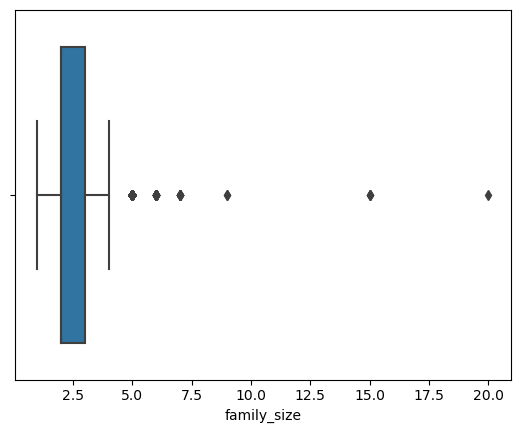

In [304]:
sns.boxplot(data=raw_df, x="family_size")

In [305]:
drop_index = raw_df[raw_df["family_size"] >= 6].index
drop_index

Int64Index([  321,   342,   875,   998,  1061,  1417,  2671,  3116,  3134,
             3973,  3988,  4094,  4118,  4355,  5681,  7195,  8431,  8462,
             8581,  9021,  9337,  9615,  9683,  9895, 10162, 10321, 10359,
            10731, 11259, 12187, 12876, 13286, 13449, 13483, 13677, 14599,
            14733, 14812, 14829, 15720, 17560, 17978, 18293, 18363, 19792,
            20117, 20329, 20557, 21639, 22024, 22155, 22592, 23782, 24077,
            25313, 25347, 25390, 25536, 25638],
           dtype='int64')

In [306]:
raw_df.drop(index=drop_index, axis=0, inplace=True)
raw_df.drop(["FLAG_MOBIL","index"], axis=1 ,inplace=True)

In [307]:
raw_df.loc[raw_df['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0 
raw_df.fillna("etc", inplace=True)

In [308]:
raw_df["DAYS_EMPLOYED"] = raw_df["DAYS_EMPLOYED"].abs()
raw_df["DAYS_BIRTH"] = raw_df["DAYS_BIRTH"].abs()
raw_df["begin_month"] = raw_df["begin_month"].abs()

In [309]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4.0,2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,etc,2.0,47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2.0,25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1.0,59.0,2.0


<AxesSubplot: xlabel='child_num'>

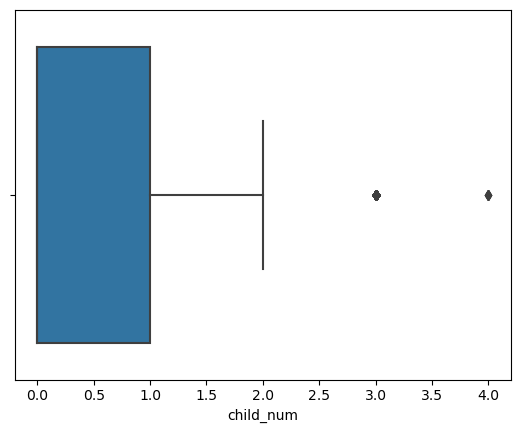

In [310]:
sns.boxplot(data=raw_df, x="child_num")

<Figure size 2000x1500 with 0 Axes>

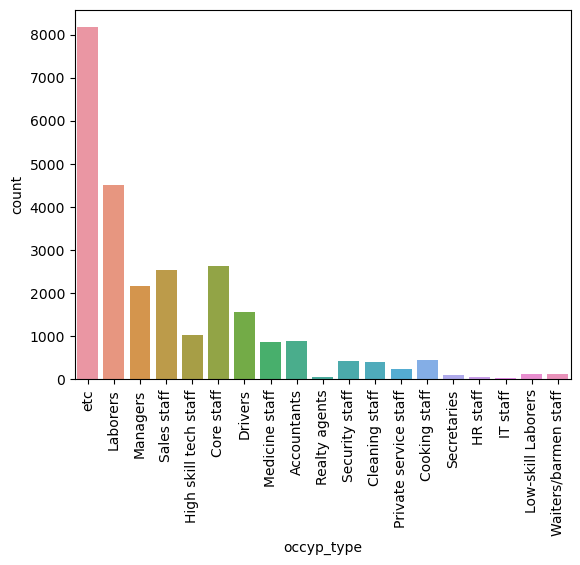

<Figure size 2000x1500 with 0 Axes>

In [311]:
sns.countplot(data=raw_df, x="occyp_type");
plt.xticks(rotation=90);
plt.figure(figsize=(20,15))

In [312]:
raw_df[raw_df["DAYS_EMPLOYED"]==4709].sort_values(by="begin_month")

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,6.0,1.0
20389,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,25.0,2.0
1773,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,31.0,2.0
11402,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,46.0,2.0
17641,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,58.0,1.0


In [313]:
raw_df[raw_df["DAYS_EMPLOYED"]==4434].sort_values(by="begin_month")

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
5255,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,7.0,2.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0
24186,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,1.0
8867,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,29.0,2.0
13572,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,44.0,2.0
8235,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,48.0,2.0


In [314]:
raw_df[raw_df["DAYS_EMPLOYED"]==4487].sort_values(by="begin_month")

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
6621,F,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,18979,4487,1,1,0,Core staff,3.0,10.0,2.0
10576,F,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,18979,4487,1,1,0,Core staff,3.0,19.0,2.0


In [315]:
raw_df_credit_0 = raw_df[raw_df["credit"]==0]
raw_df_credit_0

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0
7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,14896,5420,0,0,1,Drivers,2.0,53.0,0.0
12,F,Y,Y,1,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,11938,2162,0,0,0,Accountants,3.0,60.0,0.0
15,M,Y,Y,2,157500.0,Working,Secondary / secondary special,Married,With parents,12859,4056,0,1,0,Drivers,4.0,60.0,0.0
22,F,N,N,0,157500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,15198,1357,0,0,0,Laborers,2.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26370,F,N,Y,0,247500.0,Working,Secondary / secondary special,Widow,House / apartment,20030,2607,0,0,0,Cooking staff,1.0,41.0,0.0
26384,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,With parents,11034,2421,0,0,0,Laborers,3.0,45.0,0.0
26405,M,Y,Y,0,450000.0,Commercial associate,Higher education,Married,House / apartment,18362,2141,0,0,0,Medicine staff,2.0,57.0,0.0
26445,F,Y,Y,0,180000.0,Commercial associate,Incomplete higher,Married,House / apartment,13687,4144,0,0,0,Laborers,2.0,5.0,0.0


In [316]:
raw_df_credit_1 = raw_df[raw_df["credit"]==1]
raw_df_credit_1

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0
5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,13413,4996,0,0,1,High skill tech staff,4.0,18.0,1.0
16,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,19408,4553,0,1,0,Laborers,2.0,2.0,1.0
40,M,Y,Y,0,90900.0,Working,Secondary / secondary special,Married,House / apartment,21700,2426,0,0,0,Laborers,2.0,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,22314,0,0,1,0,etc,2.0,17.0,1.0
26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22286,0,0,0,0,etc,1.0,21.0,1.0
26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,10498,2418,1,1,0,etc,2.0,2.0,1.0
26451,F,N,Y,0,202500.0,Working,Higher education,Married,House / apartment,12831,803,1,1,0,Accountants,2.0,44.0,1.0


In [317]:
raw_df_credit_2 = raw_df[raw_df["credit"]==2]
raw_df_credit_2

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0
6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,17570,1978,0,0,1,Core staff,1.0,41.0,2.0
8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,15131,1466,0,0,1,etc,3.0,38.0,2.0
9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,15785,1308,0,0,0,Medicine staff,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26450,F,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,10338,581,0,1,0,Laborers,1.0,37.0,2.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,etc,2.0,47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2.0,25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1.0,59.0,2.0


In [318]:
column_list_Category = ["gender","car","reality","income_type","edu_type","family_type","house_type",
                        "work_phone","phone","email","occyp_type","family_size"]
column_list_continuous = ["child_num","income_total","DAYS_BIRTH","DAYS_EMPLOYED","begin_month"]

In [319]:
raw_list = [raw_df_credit_0,raw_df_credit_1,raw_df_credit_2]

In [320]:
def print_cridit_category_df(column):
    plt.figure(figsize=(18,15))
    plt.subplot(1,3,1)
    sns.countplot(x=column, data = raw_df_credit_0);
    plt.xlabel("")
    plt.ylabel("")
    plt.title("credit_0_" + column)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.countplot(x=column, data = raw_df_credit_1);
    plt.xlabel("")
    plt.ylabel("")
    plt.title("credit_1_" + column)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    sns.countplot(x=column, data = raw_df_credit_2);
    plt.xlabel("")
    plt.ylabel("")
    plt.title("credit_2_" + column)
    plt.xticks(rotation=90);

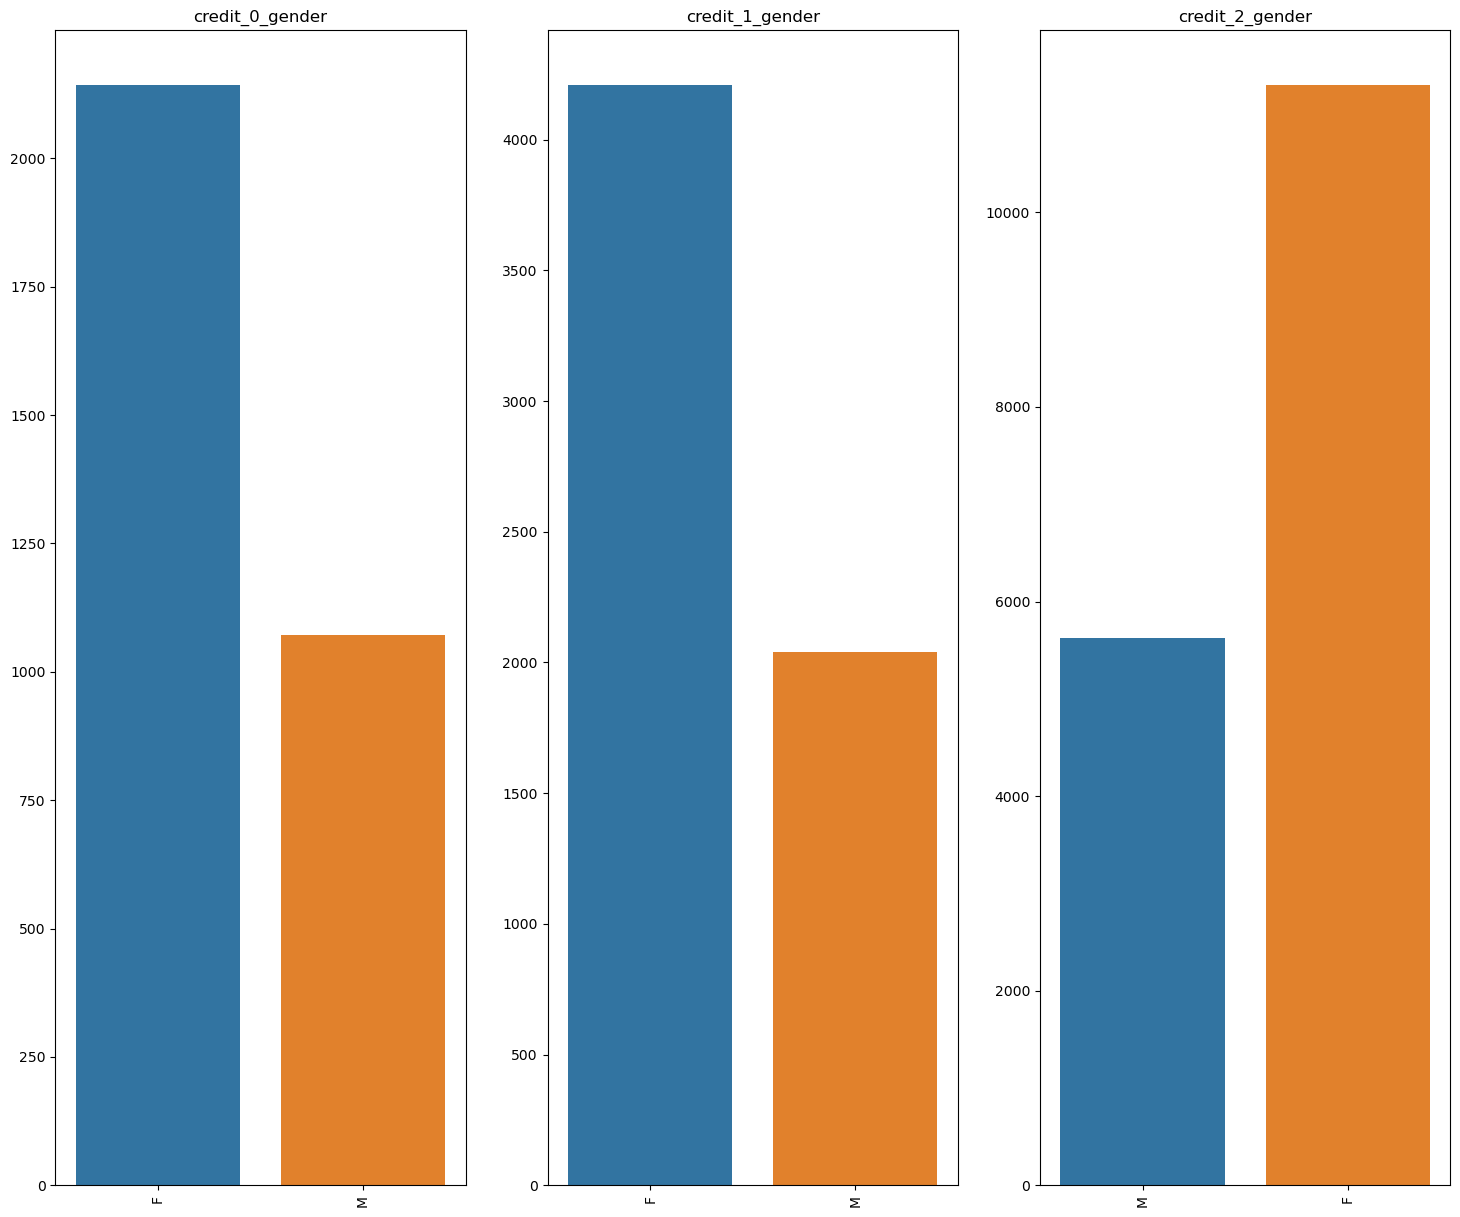

In [321]:
print_cridit_category_df("gender")

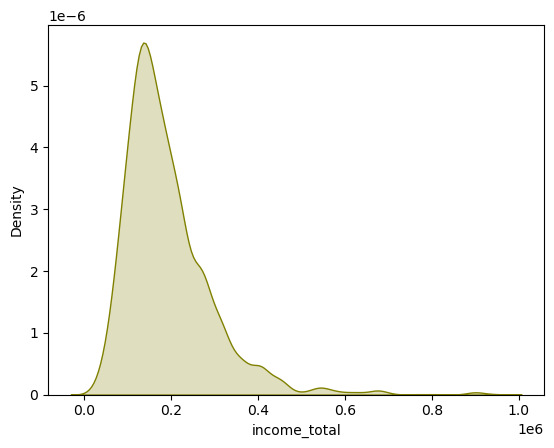

In [322]:
sns.kdeplot(x=raw_df_credit_0["income_total"], shade = True, color= "olive");

In [323]:
def print_credit_num_df(column):
    plt.figure(figsize=(18,15))
    plt.subplot(1,3,1)
    sns.kdeplot(x=raw_df_credit_0[column], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title("credit_0_" + column)

    plt.subplot(1,3,2)
    sns.kdeplot(x=raw_df_credit_1[column], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title("credit_1_" + column)

    plt.subplot(1,3,3)
    sns.kdeplot(x=raw_df_credit_2[column], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title("credit_2_" + column)

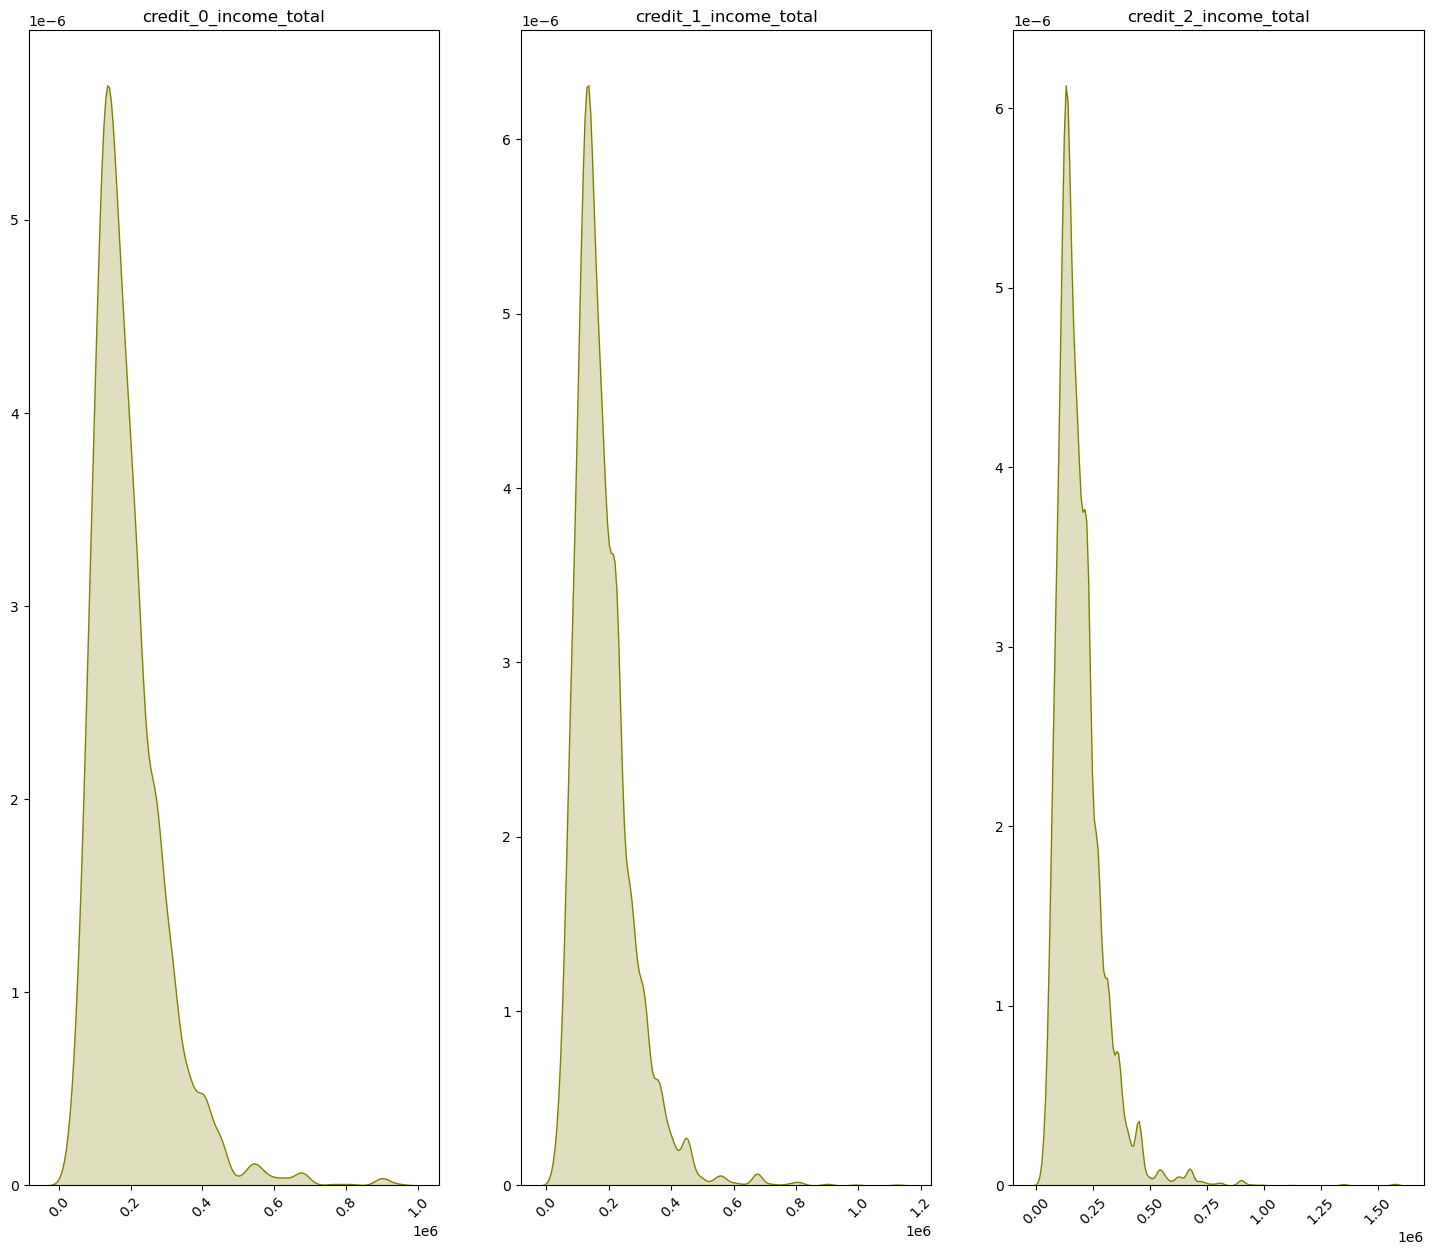

In [324]:
print_credit_num_df("income_total")

In [325]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4.0,2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,etc,2.0,47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2.0,25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1.0,59.0,2.0


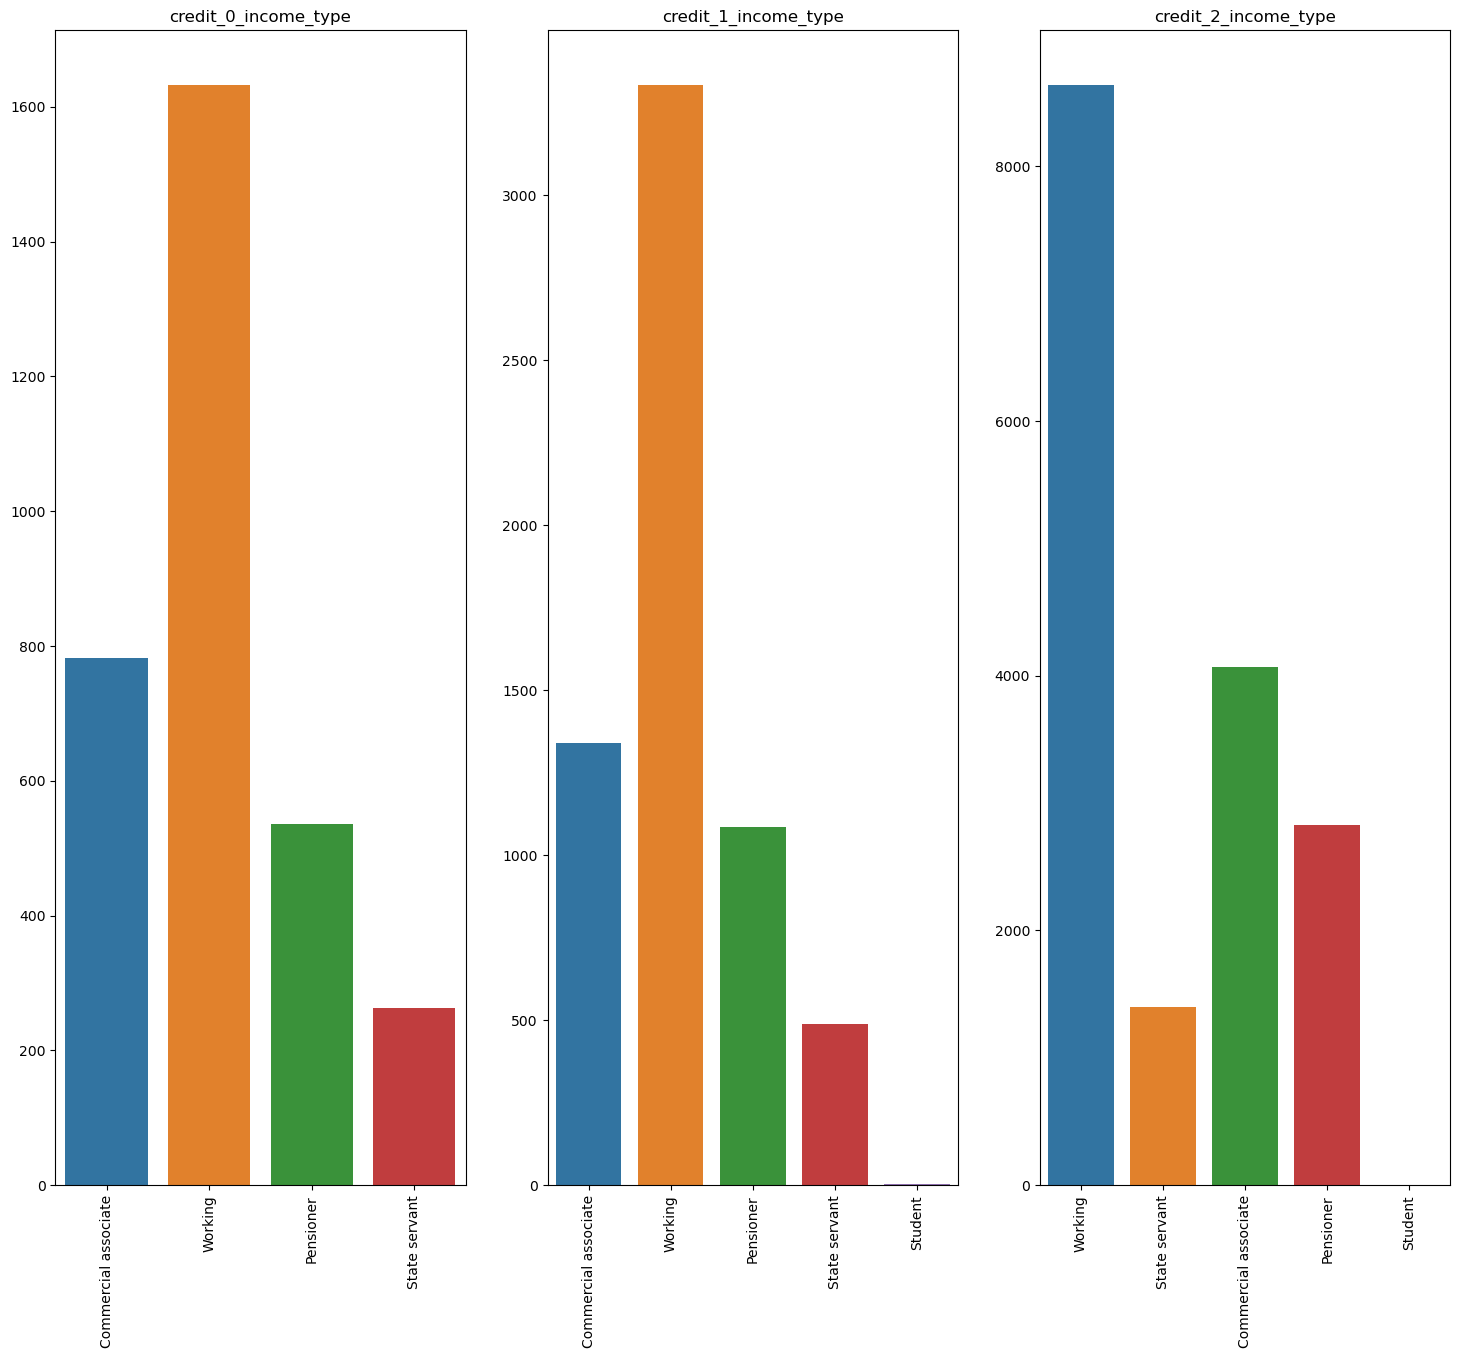

In [326]:
print_cridit_category_df("income_type")

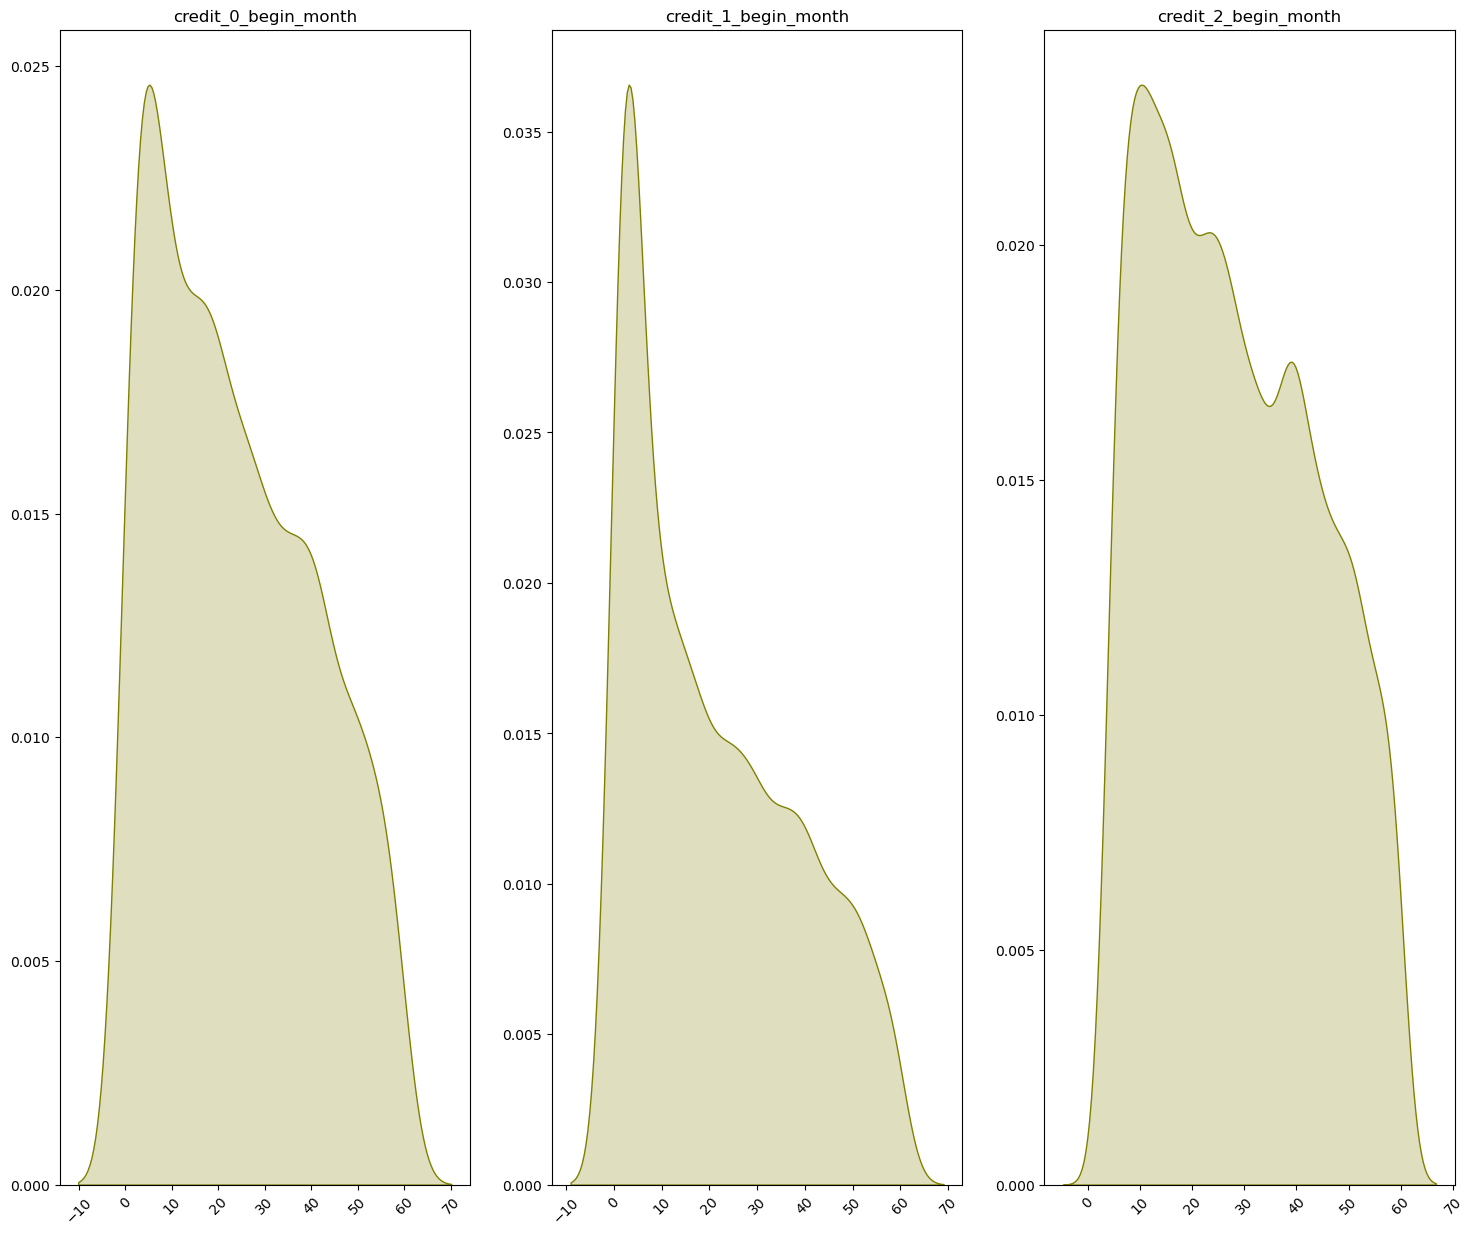

In [327]:
print_credit_num_df("begin_month")

In [328]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4.0,2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,etc,2.0,47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2.0,25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1.0,59.0,2.0


In [329]:
raw_df["gender"] = raw_df["gender"].apply(lambda x: 0 if x == "F" else 1)
raw_df["car"] = raw_df["car"].apply(lambda x: 0 if x == "N" else 1)
raw_df["reality"] = raw_df["reality"].apply(lambda x: 0 if x == "N" else 1)

In [330]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,etc,2.0,6.0,1.0
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0
3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0
4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4.0,2.0,1.0
26453,0,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,etc,2.0,47.0,2.0
26454,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2.0,25.0,2.0
26455,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1.0,59.0,2.0


In [331]:
raw_df[ (raw_df["DAYS_EMPLOYED"]==0) & (raw_df["occyp_type"]=="etc")]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,0,0,1,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22922,0,0,1,0,etc,1.0,41.0,2.0
18,0,0,1,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,23113,0,0,0,0,etc,2.0,37.0,2.0
21,0,0,0,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,21253,0,0,1,0,etc,2.0,7.0,2.0
24,0,0,0,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22361,0,0,1,0,etc,1.0,5.0,2.0
46,0,0,0,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,21100,0,0,1,0,etc,1.0,24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,0,0,1,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,21151,0,0,0,1,etc,1.0,60.0,1.0
26432,0,1,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,22314,0,0,1,0,etc,2.0,17.0,1.0
26439,0,0,1,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,19238,0,0,0,0,etc,2.0,57.0,2.0
26441,0,0,1,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,24129,0,0,0,0,etc,1.0,43.0,2.0


In [332]:
raw_df["income_total"].min()

27000.0

In [333]:
#raw_df["income_total"] = raw_df["income_total"] / 1000

In [334]:
make_label = LabelEncoder()

raw_df["income_type"] = make_label.fit_transform(raw_df["income_type"])
raw_df["edu_type"] = make_label.fit_transform(raw_df["edu_type"])
raw_df["family_type"] = make_label.fit_transform(raw_df["family_type"])
raw_df["house_type"] = make_label.fit_transform(raw_df["house_type"])
raw_df["occyp_type"] = make_label.fit_transform(raw_df["occyp_type"])

In [335]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,18,2.0,6.0,1.0
1,0,0,1,1,247500.0,0,4,0,1,11380,1540,0,0,1,8,3.0,5.0,1.0
2,1,1,1,0,450000.0,4,1,1,1,19087,4434,0,1,0,10,2.0,22.0,2.0
3,0,0,1,0,202500.0,0,4,1,1,15088,2092,0,1,0,14,2.0,37.0,0.0
4,0,1,1,0,157500.0,2,1,1,1,15037,2105,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,1984,0,0,0,3,4.0,2.0,1.0
26453,0,0,1,1,180000.0,4,1,2,1,15291,2475,0,0,0,18,2.0,47.0,2.0
26454,0,1,0,0,292500.0,4,4,0,5,10082,2015,0,0,0,3,2.0,25.0,2.0
26455,1,0,1,0,171000.0,4,2,3,1,10145,107,0,0,0,8,1.0,59.0,2.0


In [336]:
raw_df["SSN"] = raw_df["gender"].astype("str") +  raw_df["car"].astype("str") + raw_df["child_num"].astype("str") +\
raw_df["income_total"].astype("str") + raw_df["income_type"].astype("str") + raw_df["edu_type"].astype("str") + \
raw_df["family_type"].astype("str") + raw_df["house_type"].astype("str") + raw_df["DAYS_BIRTH"].astype("str") + \
raw_df["DAYS_EMPLOYED"].astype("str") + raw_df["work_phone"].astype("str") + raw_df["phone"].astype("str") + \
raw_df["email"].astype("str") + raw_df["occyp_type"].astype("str") + raw_df["family_size"].astype("str")

In [337]:
raw_df[raw_df["SSN"] == "000202500.00112138994709000182.0"]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,SSN
0,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,18,2.0,6.0,1.0,000202500.00112138994709000182.0
1773,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,18,2.0,31.0,2.0,000202500.00112138994709000182.0
11402,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,18,2.0,46.0,2.0,000202500.00112138994709000182.0
17641,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,18,2.0,58.0,1.0,000202500.00112138994709000182.0
20389,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,18,2.0,25.0,2.0,000202500.00112138994709000182.0


In [338]:
x_train[x_train["SSN"] == 8588]

KeyError: 'SSN'

In [339]:
y_train.loc[17795, :]

credit    2
Name: 17795, dtype: int32

In [340]:
categoty_list = ["SSN"]

encoder = OrdinalEncoder(cols="SSN")
raw_df["SSN"] = encoder.fit_transform(raw_df)

NameError: name 'OrdinalEncoder' is not defined

In [341]:
raw_df["SSN"] = make_label.fit_transform(raw_df["SSN"])

In [342]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,SSN
0,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,18,2.0,6.0,1.0,1677
1,0,0,1,1,247500.0,0,4,0,1,11380,1540,0,0,1,8,3.0,5.0,1.0,3742
2,1,1,1,0,450000.0,4,1,1,1,19087,4434,0,1,0,10,2.0,22.0,2.0,7973
3,0,0,1,0,202500.0,0,4,1,1,15088,2092,0,1,0,14,2.0,37.0,0.0,1691
4,0,1,1,0,157500.0,2,1,1,1,15037,2105,0,0,0,10,2.0,26.0,2.0,4581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,1984,0,0,0,3,4.0,2.0,1.0,4149
26453,0,0,1,1,180000.0,4,1,2,1,15291,2475,0,0,0,18,2.0,47.0,2.0,3601
26454,0,1,0,0,292500.0,4,4,0,5,10082,2015,0,0,0,3,2.0,25.0,2.0,4982
26455,1,0,1,0,171000.0,4,2,3,1,10145,107,0,0,0,8,1.0,59.0,2.0,6013


In [343]:
raw_df[raw_df["SSN"] ==22]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,SSN
2961,0,0,1,0,103500.0,1,4,4,1,24094,0,0,1,0,18,1.0,59.0,2.0,22
8781,0,0,1,0,103500.0,1,4,4,1,24094,0,0,1,0,18,1.0,22.0,2.0,22
10148,0,0,1,0,103500.0,1,4,4,1,24094,0,0,1,0,18,1.0,41.0,2.0,22
10173,0,0,1,0,103500.0,1,4,4,1,24094,0,0,1,0,18,1.0,18.0,1.0,22
15929,0,0,1,0,103500.0,1,4,4,1,24094,0,0,1,0,18,1.0,58.0,0.0,22
16266,0,0,1,0,103500.0,1,4,4,1,24094,0,0,1,0,18,1.0,34.0,2.0,22
18778,0,0,1,0,103500.0,1,4,4,1,24094,0,0,1,0,18,1.0,14.0,2.0,22


In [344]:
x = raw_df.drop(["credit"], axis=1)
y = raw_df[["credit"]]

In [345]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.2)

In [346]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21118, 18), (5280, 18), (21118, 1), (5280, 1))

In [347]:
scaler_minMax = MinMaxScaler()

x_train[["income_total"]] = scaler_minMax.fit_transform(x_train[["income_total"]])
x_test[["income_total"]] = scaler_minMax.transform(x_test[["income_total"]])

x_train[["DAYS_BIRTH"]] = scaler_minMax.fit_transform(x_train[["DAYS_BIRTH"]])
x_test[["DAYS_BIRTH"]] = scaler_minMax.transform(x_test[["DAYS_BIRTH"]])

x_train[["DAYS_EMPLOYED"]] = scaler_minMax.fit_transform(x_train[["DAYS_EMPLOYED"]])
x_test[["DAYS_EMPLOYED"]] = scaler_minMax.transform(x_test[["DAYS_EMPLOYED"]])

In [348]:
x_train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,SSN
8654,1,1,0,2,0.126638,0,4,1,1,0.396911,0.245020,0,0,0,18,4.0,20.0,8588
10832,1,1,0,2,0.062591,0,4,1,1,0.259631,0.042767,1,0,0,8,4.0,6.0,8493
4140,0,0,1,0,0.155750,0,4,1,1,0.528162,0.088207,0,0,0,13,2.0,8.0,2176
12306,0,1,1,3,0.062591,4,1,1,1,0.417982,0.007764,0,0,0,10,5.0,13.0,5674
10083,0,0,1,0,0.080058,1,4,3,1,0.821381,0.000000,0,0,1,18,1.0,45.0,1029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,1,1,0,0,0.053857,0,1,1,1,0.763048,0.139757,1,0,0,18,2.0,0.0,6911
24134,0,0,1,0,0.126638,0,4,3,1,0.507206,0.180360,0,0,0,14,1.0,1.0,1928
74,0,0,1,1,0.024745,4,4,1,1,0.150830,0.013938,1,1,0,14,3.0,25.0,3846
14547,0,0,1,0,0.068413,1,4,1,1,0.761670,0.000000,0,1,0,18,2.0,51.0,689


In [349]:
y_train

,credit
8654,2.0
10832,2.0
4140,2.0
12306,2.0
10083,2.0
...,...
868,1.0
24134,1.0
74,2.0
14547,1.0


In [352]:
from category_encoders import OrdinalEncoder

In [354]:
encoder = OrdinalEncoder()
x_train["SSN"] = encoder.fit_transform(x_train["SSN"], y_train['credit'])
x_test["SSN"] = encoder.transform(x_test["SSN"])

In [373]:
log_loss_gridCv(x_train, y_train, x_test, y_test)

xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result_loss:  0.8105656248286682
xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rou

KeyboardInterrupt: 

In [355]:
x = raw_df[["begin_month","DAYS_EMPLOYED","DAYS_BIRTH","house_type","edu_type", "income_type", "income_total","SSN"]]
y = raw_df[["credit"]]

In [356]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.2)

In [357]:
x_train

,begin_month,DAYS_EMPLOYED,DAYS_BIRTH,house_type,edu_type,income_type,income_total,SSN
8654,20.0,3850,14636,1,4,0,225000.0,8588
10832,6.0,672,12245,1,4,0,126000.0,8493
4140,8.0,1386,16922,1,4,0,270000.0,2176
12306,13.0,122,15003,1,1,4,126000.0,5674
10083,45.0,0,22029,1,4,1,153000.0,1029
...,...,...,...,...,...,...,...,...
868,0.0,2196,21013,1,1,0,112500.0,6911
24134,1.0,2834,16557,1,4,0,225000.0,1928
74,25.0,219,10350,1,4,4,67500.0,3846
14547,51.0,0,20989,1,4,1,135000.0,689


In [359]:
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='Bernoulli')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["house_type","edu_type","income_type","SSN"],
verbose=100)

pred = cat.predict_proba(x_test)
print("log_loss : ",log_loss(y_test, pred))

pred = cat.predict(x_test)
print("ac_score : ", accuracy_score(y_test, pred))

0:	learn: 1.0759069	test: 1.0758583	test1: 1.0756463	best: 1.0756463 (0)	total: 169ms	remaining: 8m 27s
100:	learn: 0.7229024	test: 0.5156335	test1: 0.6855751	best: 0.6855751 (100)	total: 15.1s	remaining: 7m 13s
200:	learn: 0.7023171	test: 0.4836463	test1: 0.6783192	best: 0.6783192 (200)	total: 38.8s	remaining: 9m
300:	learn: 0.6813383	test: 0.4729830	test1: 0.6772998	best: 0.6771718 (278)	total: 1m 5s	remaining: 9m 48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6771718087
bestIteration = 278

Shrink model to first 279 iterations.
log_loss :  0.6771718087194405
ac_score :  0.737310606060606


In [361]:
cat.feature_names_

['begin_month',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'house_type',
 'edu_type',
 'income_type',
 'income_total',
 'SSN']

In [379]:
log_loss_gridCv(x_train, y_train, x_test, y_test)

xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result_loss:  0.7914289254663176
xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rou

KeyboardInterrupt: 

In [250]:
hist, bins = np.histogram(raw_df["income_total"], 50)
bins_name = [i for i in range(50)]
raw_df["income_total"] = pd.cut(x=raw_df["income_total"], bins=bins, labels=bins_name, include_lowest=True)

hist, bins = np.histogram(raw_df["DAYS_BIRTH"], 50)
bins_name = [i for i in range(50)]
raw_df["DAYS_BIRTH"] = pd.cut(x=raw_df["DAYS_BIRTH"], bins=bins, labels=bins_name, include_lowest=True)

hist, bins = np.histogram(raw_df["DAYS_EMPLOYED"], 50)
bins_name = [i for i in range(50)]
raw_df["DAYS_EMPLOYED"] = pd.cut(x=raw_df["DAYS_EMPLOYED"], bins=bins, labels=bins_name, include_lowest=True)

In [251]:
raw_df["family_size"] = raw_df["family_size"].astype("int")

In [252]:
raw_df["SSN"] = raw_df["gender"].astype("str") +  raw_df["car"].astype("str") + raw_df["child_num"].astype("str") +\
raw_df["income_total"].astype("str") + raw_df["income_type"].astype("str") + raw_df["edu_type"].astype("str") + \
raw_df["family_type"].astype("str") + raw_df["house_type"].astype("str") + raw_df["DAYS_BIRTH"].astype("str") + \
raw_df["DAYS_EMPLOYED"].astype("str") + raw_df["work_phone"].astype("str") + raw_df["phone"].astype("str") + \
raw_df["email"].astype("str") + raw_df["occyp_type"].astype("str") + raw_df["family_size"].astype("str")

In [311]:
raw_df["income_total"] = raw_df["income_total"].astype("int")
raw_df["DAYS_BIRTH"] = raw_df["DAYS_BIRTH"].astype("int")
raw_df["DAYS_EMPLOYED"] = raw_df["DAYS_EMPLOYED"].astype("int")

In [312]:
raw_df["SSN"] = make_label.fit_transform(raw_df["SSN"])

In [313]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,SSN
0,0,0,0,0,5,0,1,1,2,17,14,0,0,0,18,2,6.0,1.0,2141
1,0,0,1,1,7,0,4,0,1,10,4,0,0,1,8,3,5.0,1.0,3545
2,1,1,1,0,13,4,1,1,1,32,14,0,1,0,10,2,22.0,2.0,6607
3,0,0,1,0,5,0,4,1,1,21,6,0,1,0,14,2,37.0,0.0,2160
4,0,1,1,0,4,2,1,1,1,21,6,0,0,0,10,2,26.0,2.0,4445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,6,2,4,1,1,12,6,0,0,0,3,4,2.0,1.0,3863
26453,0,0,1,1,4,4,1,2,1,21,7,0,0,0,18,2,47.0,2.0,3350
26454,0,1,0,0,8,4,4,0,5,6,6,0,0,0,3,2,25.0,2.0,4803
26455,1,0,1,0,4,4,2,3,1,6,0,0,0,0,8,1,59.0,2.0,5775


In [314]:
x = raw_df.drop(["credit"], axis=1)
y = raw_df[["credit"]]

In [315]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.2)

In [296]:
'''
scaler_minMax = MinMaxScaler()

x_train[["income_total"]] = scaler_minMax.fit_transform(x_train[["income_total"]])
x_test[["income_total"]] = scaler_minMax.transform(x_test[["income_total"]])

x_train[["begin_month"]] = scaler_minMax.fit_transform(x_train[["begin_month"]])
x_test[["begin_month"]] = scaler_minMax.transform(x_test[["begin_month"]])

x_train[["income_total"]] = scaler_minMax.fit_transform(x_train[["income_total"]])
x_test[["income_total"]] = scaler_minMax.transform(x_test[["income_total"]])

x_train[["income_total"]] = scaler_minMax.fit_transform(x_train[["income_total"]])
x_test[["income_total"]] = scaler_minMax.transform(x_test[["income_total"]])
'''

In [316]:
x_train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,SSN
8654,1,1,0,2,6,0,4,1,1,19,12,0,0,0,18,4,20.0,8216
10832,1,1,0,2,3,0,4,1,1,13,2,1,0,0,8,4,6.0,8121
4140,0,0,1,0,7,0,4,1,1,26,4,0,0,0,13,2,8.0,2599
12306,0,1,1,3,3,4,1,1,1,20,0,0,0,0,10,5,13.0,5300
10083,0,0,1,0,4,1,4,3,1,41,0,0,0,1,18,1,45.0,1797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,1,1,0,0,2,0,1,1,1,38,6,1,0,0,18,2,0.0,6652
24134,0,0,1,0,6,0,4,3,1,25,9,0,0,0,14,1,1.0,2406
74,0,0,1,1,1,4,4,1,1,7,0,1,1,0,14,3,25.0,2944
14547,0,0,1,0,3,1,4,1,1,38,0,0,1,0,18,2,51.0,1249


In [320]:
log_loss_gridCv(x_train, y_train, x_test, y_test)

xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result_loss:  0.829304360733507
xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_roun

KeyboardInterrupt: 

In [309]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21118 entries, 8654 to 339
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         21118 non-null  int64   
 1   car            21118 non-null  int64   
 2   reality        21118 non-null  int64   
 3   child_num      21118 non-null  int64   
 4   income_total   21118 non-null  category
 5   income_type    21118 non-null  int32   
 6   edu_type       21118 non-null  int32   
 7   family_type    21118 non-null  int32   
 8   house_type     21118 non-null  int32   
 9   DAYS_BIRTH     21118 non-null  category
 10  DAYS_EMPLOYED  21118 non-null  category
 11  work_phone     21118 non-null  int64   
 12  phone          21118 non-null  int64   
 13  email          21118 non-null  int64   
 14  occyp_type     21118 non-null  int32   
 15  family_size    21118 non-null  int32   
 16  begin_month    21118 non-null  float64 
 17  SSN            21118 non-null 

## 6일차, 전처리 및 가공 데이터 공유

In [50]:
def log_loss_gridCv(x_train, y_train, x_test, y_test):
    xg = XGBClassifier()
    lgbm = LGBMClassifier()
    
    # xgbcBoost
    xg = XGBClassifier()
    params = {
        "n_estimators" : [1000, 2000],
        "max_depth" : [5, 9],
        "random_state" : [13]
    }
    clf_grid = GridSearchCV(xg, param_grid=params, cv=2, scoring="neg_log_loss")
    clf_grid.fit(x_train, y_train)

    df_importance = pd.DataFrame(columns=clf_grid.feature_names_in_)

    pred = clf_grid.predict_proba(x_test)
    print("xgbm_best : ",clf_grid.best_estimator_)
    print("xgbm_result_loss: ",log_loss(y_test, pred))
    pred = clf_grid.predict(x_test)
    print("xgbm_result_ac : ", accuracy_score(y_test, pred))
    df_importance.loc[0] = clf_grid.best_estimator_.feature_importances_.tolist()
    print("=" * 50)
    
    #lgbm
    params = {
    "n_estimators" : [1000, 1500, 2000],
    "random_state" : [13]
    }
    clf_grid = GridSearchCV(lgbm, param_grid=params, cv=2, scoring="neg_log_loss")
    clf_grid.fit(x_train, y_train)


    pred = clf_grid.predict_proba(x_test)
    print("lgbm_best : ",clf_grid.best_estimator_)
    print("lgbm_result_loss : ",log_loss(y_test, pred))
    pred = clf_grid.predict(x_test)
    print("lgbm_result_ac : ", accuracy_score(y_test, pred))
    df_importance.loc[1] = clf_grid.best_estimator_.feature_importances_.tolist()
    print("=" * 50)
    
    cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='Bernoulli')
    cat.fit(x_train, y_train,
    eval_set=[(x_train, y_train), (x_test, y_test)],
    early_stopping_rounds=50,
    verbose=100)

    pred = cat.predict_proba(x_test)
    print("cat_log_loss : ",log_loss(y_test, pred))

    pred = cat.predict(x_test)
    print("cat_ac_score : ",accuracy_score(y_test, pred))
    
    df_importance.loc[2] = cat.feature_importances_.tolist()
    
    df_importance.rename(index={0 : "XGBC", 1 : "LGBMC", 2 : "Cat"}, inplace=True)
    return df_importance

In [2]:
url = "https://raw.githubusercontent.com/DataResolvere/Project/main/first_project/data_0407.csv"

raw_df = pd.read_csv(url)
raw_df

,Unnamed: 0.1,Unnamed: 0,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
0,0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,6.0,1.0
1,1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,5.0,1.0
2,2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,22.0,2.0
3,3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,37.0,0.0
4,4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26448,26448,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,2.0,1.0
26449,26449,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,NaN,47.0,2.0
26450,26450,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,25.0,2.0
26451,26451,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,59.0,2.0


In [3]:
raw_df = raw_df.iloc[:, 2:]
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26448,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,2.0,1.0
26449,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,NaN,47.0,2.0
26450,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,25.0,2.0
26451,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,59.0,2.0


In [4]:
# 데이터 전처리, binary형태의 데이터 int형태로 변환

In [5]:
raw_df["gender"] = raw_df["gender"].apply(lambda x: 0 if x == "F" else 1)
raw_df["car"] = raw_df["car"].apply(lambda x: 0 if x == "N" else 1)
raw_df["reality"] = raw_df["reality"].apply(lambda x: 0 if x == "N" else 1)

In [6]:
# 데이터에서 결측값 제거

In [7]:
raw_df.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'begin_month', 'credit'],
      dtype='object')

In [8]:
for name in raw_df.columns:
    print(name)
    print(raw_df[name].value_counts())
    print("=" * 50)

gender
0    17696
1     8757
Name: gender, dtype: int64
car
0    16409
1    10044
Name: car, dtype: int64
reality
1    17826
0     8627
Name: reality, dtype: int64
child_num
0    18340
1     5386
2     2362
3      306
4       47
5       10
7        2
Name: child_num, dtype: int64
income_total
135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2177
225000.0    2167
            ... 
57150.0        1
51750.0        1
87448.5        1
227250.0       1
191700.0       1
Name: income_total, Length: 249, dtype: int64
income_type
Working                 13641
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64
edu_type
Secondary / secondary special    17991
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64
family_type
Married                 18196
Sing

In [9]:
drop_index = raw_df[raw_df["income_type"] == "Student"].index
drop_index

Int64Index([2990, 3602, 6223, 8935, 11643, 21678, 23116], dtype='int64')

In [10]:
raw_df.drop(index=drop_index, axis=0, inplace=True)

In [11]:
drop_index =  raw_df[raw_df["child_num"] >= 5].index
drop_index

Int64Index([2671, 4094, 9613, 10319, 12873, 17557, 17975, 19789, 20114, 22589,
            25310, 25634],
           dtype='int64')

In [12]:
raw_df.drop(index=drop_index, axis=0, inplace=True)

In [13]:
# occyp_type의 Nan데이터 관찰

In [14]:
raw_nan_data = raw_df[raw_df["occyp_type"].isna()]
raw_nan_data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,6.0,1.0
8,1,1,1,1,180000.0,Commercial associate,Higher education,Married,House / apartment,15131,1466,0,0,1,NaN,38.0,2.0
14,0,0,1,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22922,0,0,1,0,NaN,41.0,2.0
18,0,0,1,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,23113,0,0,0,0,NaN,37.0,2.0
19,0,0,1,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,13727,6031,0,0,0,NaN,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26435,0,0,1,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,19238,0,0,0,0,NaN,57.0,2.0
26437,0,0,1,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,24129,0,0,0,0,NaN,43.0,2.0
26439,0,0,1,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22286,0,0,0,0,NaN,21.0,1.0
26445,0,0,0,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,10498,2418,1,1,0,NaN,2.0,1.0


In [15]:
raw_nan_data["income_type"].value_counts()

Pensioner               4440
Working                 2311
Commercial associate    1026
State servant            392
Name: income_type, dtype: int64

In [16]:
raw_df["income_type"].value_counts()

Working                 13629
Commercial associate     6202
Pensioner                4449
State servant            2154
Name: income_type, dtype: int64

In [17]:
raw_df[ (raw_df["occyp_type"].notna()) & (raw_df["income_type"] == "Pensioner")]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
1964,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,12387,1325,0,1,1,Medicine staff,32.0,2.0
5786,1,0,0,0,247500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,15037,2208,0,0,0,Laborers,30.0,2.0
6695,0,0,1,2,270000.0,Pensioner,Higher education,Single / not married,House / apartment,10425,2745,0,0,0,Core staff,36.0,2.0
9791,0,0,0,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,20600,198,0,0,0,Laborers,20.0,2.0
10355,1,1,1,1,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,11050,443,1,0,0,Drivers,19.0,2.0
14353,1,1,0,0,292500.0,Pensioner,Higher education,Single / not married,House / apartment,14050,3680,1,1,0,Laborers,41.0,2.0
17275,0,0,1,3,292500.0,Pensioner,Secondary / secondary special,Married,House / apartment,12368,672,0,0,0,Core staff,21.0,2.0
23224,0,1,1,0,270000.0,Pensioner,Higher education,Married,House / apartment,17833,620,0,1,0,Accountants,25.0,2.0
26155,0,1,0,0,450000.0,Pensioner,Higher education,Married,House / apartment,19783,5521,1,1,0,Managers,46.0,2.0


In [18]:
raw_df.groupby(["income_type", "occyp_type"]).agg({"credit" : ["mean","count"]}).columns

MultiIndex([('credit',  'mean'),
            ('credit', 'count')],
           )

In [19]:
raw_df.groupby(["income_type", "occyp_type"]).agg({"credit" : ["mean","count"]}).sort_values(by=('credit',  'mean'))

credit      
                                                mean count
income_type          occyp_type                           
State servant        Private service staff  1.000000    15
                     Sales staff            1.100000    10
                     Waiters/barmen staff   1.193548    31
Working              IT staff               1.250000    20
Commercial associate Waiters/barmen staff   1.300000    40
                     Cooking staff          1.315217    92
                     Low-skill Laborers     1.333333    33
State servant        Secretaries            1.363636    22
Working              Accountants            1.439232   469
Commercial associate Realty agents          1.441860    43
                     IT staff               1.466667    15
                     High skill tech staff  1.470588   306
State servant        Drivers                1.471264    87
Working              Secretaries            1.475410    61
State servant        Core staff             1.487023   655
Working              Laborers               1.494977  3285
                     Sales staff            1.499700  1669
                     Private service staff  1.500000   132
State servant        IT staff               1.500000     6
Working              Core staff             1.502907  1376
Commercial associate Accountants            1.506887   363
Working              High skill tech staff  1.508532   586
Commercial associate Laborers               1.511628  1075
                     Core staff             1.518883   609
Working              Managers               1.519266  1090
                     Drivers                1.522514  1066
                     Low-skill Laborers     1.527473    91
                     Cooking staff          1.533951   324
State servant        Laborers               1.535211   142
Commercial associate Managers               1.541371   846
                     Private service staff  1.541667    96
                     Sales staff            1.544186   860
                     Cleaning staff         1.550000    80
State servant        High skill tech staff  1.554054   148
                     Managers               1.557522   226
                     Cleaning staff         1.562500    16
Working              Medicine staff         1.567100   462
                     Cleaning staff         1.573770   305
Commercial associate Drivers                1.576555   418
State servant        Medicine staff         1.605839   274
Working              Security staff         1.606618   272
Commercial associate Security staff         1.608696   138
                     Medicine staff         1.614173   127
State servant        Security staff         1.642857    14
Working              Waiters/barmen staff   1.673077    52
                     HR staff               1.684211    38
State servant        Accountants            1.695652    69
                     Cooking staff          1.707317    41
Commercial associate HR staff               1.714286    21
Working              Realty agents          1.750000    20
Commercial associate Secretaries            1.785714    14
Pensioner            Medicine staff         2.000000     1
                     Managers               2.000000     1
                     Laborers               2.000000     3
                     Drivers                2.000000     1
                     Core staff             2.000000     2
                     Accountants            2.000000     1
State servant        Low-skill Laborers     2.000000     3
                     HR staff               2.000000     3

In [20]:
raw_df["income_type"].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner'],
      dtype=object)

In [21]:
raw_df["occyp_type"].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [22]:
raw_df[raw_df["income_type"] == "Commercial associate"]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,6.0,1.0
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,5.0,1.0
3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,37.0,0.0
7,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,14896,5420,0,0,1,Drivers,53.0,0.0
8,1,1,1,1,180000.0,Commercial associate,Higher education,Married,House / apartment,15131,1466,0,0,1,NaN,38.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26432,0,0,1,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,10924,97,0,0,0,Cleaning staff,22.0,2.0
26440,1,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,19818,4113,0,0,0,Managers,19.0,2.0
26441,0,1,1,0,180000.0,Commercial associate,Incomplete higher,Married,House / apartment,13687,4144,0,0,0,Laborers,5.0,0.0
26444,1,0,1,0,292500.0,Commercial associate,Higher education,Married,House / apartment,16280,887,0,0,0,Laborers,23.0,0.0


In [23]:
raw_df.fillna("etc", inplace=True)

In [24]:
raw_df["income_occupy"] = raw_df["income_type"] + "_" + raw_df["occyp_type"]

In [25]:
raw_df["car_reality"] = raw_df["car"].astype("str") + "_" + raw_df["reality"].astype("str")

In [26]:
raw_df.drop(["work_phone", "phone", "email", "income_type", "occyp_type"], axis=1, inplace=True)

In [27]:
raw_df.drop(["gender", "car", "reality", "child_num"], axis=1, inplace=True)

In [28]:
raw_df

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit,income_occupy,car_reality
0,202500.0,Higher education,Married,Municipal apartment,13899,4709,6.0,1.0,Commercial associate_etc,0_0
1,247500.0,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,5.0,1.0,Commercial associate_Laborers,0_1
2,450000.0,Higher education,Married,House / apartment,19087,4434,22.0,2.0,Working_Managers,1_1
3,202500.0,Secondary / secondary special,Married,House / apartment,15088,2092,37.0,0.0,Commercial associate_Sales staff,0_1
4,157500.0,Higher education,Married,House / apartment,15037,2105,26.0,2.0,State servant_Managers,1_1
...,...,...,...,...,...,...,...,...,...,...
26448,225000.0,Secondary / secondary special,Married,House / apartment,12079,1984,2.0,1.0,State servant_Core staff,0_0
26449,180000.0,Higher education,Separated,House / apartment,15291,2475,47.0,2.0,Working_etc,0_1
26450,292500.0,Secondary / secondary special,Civil marriage,With parents,10082,2015,25.0,2.0,Working_Core staff,1_0
26451,171000.0,Incomplete higher,Single / not married,House / apartment,10145,107,59.0,2.0,Working_Laborers,0_1


In [29]:
print(1984//30 - 2.0)

64.0


In [30]:
raw_df["card_begin_before_employed"] = (raw_df["DAYS_EMPLOYED"] // 30) - raw_df["begin_month"]

In [31]:
raw_df

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit,income_occupy,car_reality,card_begin_before_employed
0,202500.0,Higher education,Married,Municipal apartment,13899,4709,6.0,1.0,Commercial associate_etc,0_0,150.0
1,247500.0,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,5.0,1.0,Commercial associate_Laborers,0_1,46.0
2,450000.0,Higher education,Married,House / apartment,19087,4434,22.0,2.0,Working_Managers,1_1,125.0
3,202500.0,Secondary / secondary special,Married,House / apartment,15088,2092,37.0,0.0,Commercial associate_Sales staff,0_1,32.0
4,157500.0,Higher education,Married,House / apartment,15037,2105,26.0,2.0,State servant_Managers,1_1,44.0
...,...,...,...,...,...,...,...,...,...,...,...
26448,225000.0,Secondary / secondary special,Married,House / apartment,12079,1984,2.0,1.0,State servant_Core staff,0_0,64.0
26449,180000.0,Higher education,Separated,House / apartment,15291,2475,47.0,2.0,Working_etc,0_1,35.0
26450,292500.0,Secondary / secondary special,Civil marriage,With parents,10082,2015,25.0,2.0,Working_Core staff,1_0,42.0
26451,171000.0,Incomplete higher,Single / not married,House / apartment,10145,107,59.0,2.0,Working_Laborers,0_1,-56.0


In [32]:
raw_df["card_begin_before_employed"].describe()

count    26434.000000
mean        46.752554
std         79.323559
min        -60.000000
25%         -7.000000
50%         26.000000
75%         78.000000
max        507.000000
Name: card_begin_before_employed, dtype: float64

In [33]:
raw_df[raw_df["card_begin_before_employed"] < 26]["credit"].value_counts(), \
raw_df[raw_df["card_begin_before_employed"] < 26]["credit"].value_counts().sum()

(2.0    8434
 1.0    3067
 0.0    1536
 Name: credit, dtype: int64,
 13037)

In [34]:
raw_df[raw_df["card_begin_before_employed"] > 26]["credit"].value_counts(), \
raw_df[raw_df["card_begin_before_employed"] > 26]["credit"].value_counts().sum()

(2.0    8407
 1.0    3154
 0.0    1655
 Name: credit, dtype: int64,
 13216)

In [35]:
raw_df["income_total"] = raw_df["income_total"] / 10000
raw_df["DAYS_BIRTH"] = raw_df["DAYS_BIRTH"] / 365
raw_df["DAYS_EMPLOYED"] = raw_df["DAYS_EMPLOYED"] / 12
raw_df["credit"] = raw_df["credit"].astype('int')

In [36]:
raw_df

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit,income_occupy,car_reality,card_begin_before_employed
0,20.25,Higher education,Married,Municipal apartment,38.079452,392.416667,6.0,1,Commercial associate_etc,0_0,150.0
1,24.75,Secondary / secondary special,Civil marriage,House / apartment,31.178082,128.333333,5.0,1,Commercial associate_Laborers,0_1,46.0
2,45.00,Higher education,Married,House / apartment,52.293151,369.500000,22.0,2,Working_Managers,1_1,125.0
3,20.25,Secondary / secondary special,Married,House / apartment,41.336986,174.333333,37.0,0,Commercial associate_Sales staff,0_1,32.0
4,15.75,Higher education,Married,House / apartment,41.197260,175.416667,26.0,2,State servant_Managers,1_1,44.0
...,...,...,...,...,...,...,...,...,...,...,...
26448,22.50,Secondary / secondary special,Married,House / apartment,33.093151,165.333333,2.0,1,State servant_Core staff,0_0,64.0
26449,18.00,Higher education,Separated,House / apartment,41.893151,206.250000,47.0,2,Working_etc,0_1,35.0
26450,29.25,Secondary / secondary special,Civil marriage,With parents,27.621918,167.916667,25.0,2,Working_Core staff,1_0,42.0
26451,17.10,Incomplete higher,Single / not married,House / apartment,27.794521,8.916667,59.0,2,Working_Laborers,0_1,-56.0


In [37]:
make_label = LabelEncoder()

raw_df["edu_type"] = make_label.fit_transform(raw_df["edu_type"])
raw_df["family_type"] = make_label.fit_transform(raw_df["family_type"])
raw_df["house_type"] = make_label.fit_transform(raw_df["house_type"])
raw_df["income_occupy"] = make_label.fit_transform(raw_df["income_occupy"])
raw_df["car_reality"] = make_label.fit_transform(raw_df["car_reality"])

In [38]:
raw_df

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit,income_occupy,car_reality,card_begin_before_employed
0,20.25,1,1,2,38.079452,392.416667,6.0,1,18,0,150.0
1,24.75,4,0,1,31.178082,128.333333,5.0,1,8,1,46.0
2,45.00,1,1,1,52.293151,369.500000,22.0,2,54,3,125.0
3,20.25,4,1,1,41.336986,174.333333,37.0,0,14,1,32.0
4,15.75,1,1,1,41.197260,175.416667,26.0,2,36,3,44.0
...,...,...,...,...,...,...,...,...,...,...,...
26448,22.50,4,1,1,33.093151,165.333333,2.0,1,29,0,64.0
26449,18.00,1,2,1,41.893151,206.250000,47.0,2,62,1,35.0
26450,29.25,4,0,5,27.621918,167.916667,25.0,2,47,2,42.0
26451,17.10,2,3,1,27.794521,8.916667,59.0,2,52,1,-56.0


In [69]:
x = raw_df.drop(["credit"], axis=1)
y = raw_df[["credit"]]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [71]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21147, 10), (5287, 10), (21147, 1), (5287, 1))

In [72]:
x_train

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,income_occupy,car_reality,card_begin_before_employed
19286,45.00,4,1,1,48.884932,16.833333,31.0,18,3,-25.0
2124,17.55,4,3,2,32.079452,415.250000,12.0,8,2,154.0
2076,9.00,4,3,1,56.558904,0.000000,8.0,25,0,-8.0
26207,8.10,4,1,1,45.027397,812.083333,40.0,62,1,284.0
17248,11.25,4,0,1,63.712329,0.000000,15.0,25,1,-15.0
...,...,...,...,...,...,...,...,...,...,...
866,11.25,4,1,1,30.106849,11.250000,57.0,62,1,-53.0
24097,13.50,4,0,1,27.810959,94.833333,11.0,52,0,26.0
74,6.75,4,1,1,28.356164,18.250000,25.0,58,1,-18.0
14522,81.00,2,0,3,49.101370,287.916667,8.0,16,3,107.0


In [73]:
y_train

,credit
19286,2
2124,2
2076,2
26207,1
17248,0
...,...
866,1
24097,2
74,2
14522,2


In [74]:
feature_df = log_loss_gridCv(x_train, y_train, x_test, y_test)
feature_df

xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result_loss:  0.8074692812763485
xgbm_result_ac :  0.7089086438433895
lgbm_best :  LGBMClassifier(n_estimators=1000, random_state=13)
lgbm_result_loss :  0.7979295675004349
lgbm_result_ac :  0.6966143370531492
0:	learn: 1.0

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,income_occupy,car_reality,card_begin_before_employed
0,0.095623,0.087354,0.091884,0.101831,0.100099,0.106106,0.150114,0.098529,0.097390,0.071070
1,12903.000000,2382.000000,2647.000000,1021.000000,19433.000000,11700.000000,13493.000000,8513.000000,3876.000000,14032.000000
2,13.660073,9.547749,7.271208,2.121254,13.414119,7.872984,16.398862,11.602384,11.605109,6.506259


In [51]:
scale_s = StandardScaler()

x_train[["income_total"]] = scale_s.fit_transform(x_train[["income_total"]])
x_test[["income_total"]] = scale_s.transform(x_test[["income_total"]])

x_train[["DAYS_BIRTH"]] = scale_s.fit_transform(x_train[["DAYS_BIRTH"]])
x_test[["DAYS_BIRTH"]] = scale_s.transform(x_test[["DAYS_BIRTH"]])

x_train[["DAYS_EMPLOYED"]] = scale_s.fit_transform(x_train[["DAYS_EMPLOYED"]])
x_test[["DAYS_EMPLOYED"]] = scale_s.transform(x_test[["DAYS_EMPLOYED"]])

x_train[["card_begin_before_employed"]] = scale_s.fit_transform(x_train[["card_begin_before_employed"]])
x_test[["card_begin_before_employed"]] = scale_s.transform(x_test[["card_begin_before_employed"]])

In [49]:
x_train

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,income_occupy,car_reality,card_begin_before_employed
19286,45.00,4,1,1,48.884932,16.833333,31.0,18,3,-25.0
2124,17.55,4,3,2,32.079452,415.250000,12.0,8,2,154.0
2076,9.00,4,3,1,56.558904,0.000000,8.0,25,0,-8.0
26207,8.10,4,1,1,45.027397,812.083333,40.0,62,1,284.0
17248,11.25,4,0,1,63.712329,0.000000,15.0,25,1,-15.0
...,...,...,...,...,...,...,...,...,...,...
866,11.25,4,1,1,30.106849,11.250000,57.0,62,1,-53.0
24097,13.50,4,0,1,27.810959,94.833333,11.0,52,0,26.0
74,6.75,4,1,1,28.356164,18.250000,25.0,58,1,-18.0
14522,81.00,2,0,3,49.101370,287.916667,8.0,16,3,107.0


In [67]:
feature_df = log_loss_gridCv(x_train, y_train, x_test, y_test)

xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result_loss:  0.8074692812763485
xgbm_result_ac :  0.7089086438433895
lgbm_best :  LGBMClassifier(n_estimators=1000, random_state=13)
lgbm_result_loss :  0.7979295675004349
lgbm_result_ac :  0.6966143370531492
0:	learn: 1.0

In [81]:
feature_df

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,income_occupy,car_reality,card_begin_before_employed
0,0.095623,0.087354,0.091884,0.101831,0.100099,0.106106,0.150114,0.098529,0.097390,0.071070
1,12903.000000,2382.000000,2647.000000,1021.000000,19433.000000,11700.000000,13493.000000,8513.000000,3876.000000,14032.000000
2,13.660073,9.547749,7.271208,2.121254,13.414119,7.872984,16.398862,11.602384,11.605109,6.506259


In [75]:
raw_df

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit,income_occupy,car_reality,card_begin_before_employed
0,20.25,1,1,2,38.079452,392.416667,6.0,1,18,0,150.0
1,24.75,4,0,1,31.178082,128.333333,5.0,1,8,1,46.0
2,45.00,1,1,1,52.293151,369.500000,22.0,2,54,3,125.0
3,20.25,4,1,1,41.336986,174.333333,37.0,0,14,1,32.0
4,15.75,1,1,1,41.197260,175.416667,26.0,2,36,3,44.0
...,...,...,...,...,...,...,...,...,...,...,...
26448,22.50,4,1,1,33.093151,165.333333,2.0,1,29,0,64.0
26449,18.00,1,2,1,41.893151,206.250000,47.0,2,62,1,35.0
26450,29.25,4,0,5,27.621918,167.916667,25.0,2,47,2,42.0
26451,17.10,2,3,1,27.794521,8.916667,59.0,2,52,1,-56.0


In [32]:
url = "https://raw.githubusercontent.com/DataResolvere/Project/main/first_project/data_0407.csv"

raw_df = pd.read_csv(url)
raw_df

,Unnamed: 0.1,Unnamed: 0,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
0,0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,6.0,1.0
1,1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,5.0,1.0
2,2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,22.0,2.0
3,3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,37.0,0.0
4,4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26448,26448,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,2.0,1.0
26449,26449,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,NaN,47.0,2.0
26450,26450,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,25.0,2.0
26451,26451,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,59.0,2.0


In [33]:
raw_df = raw_df.iloc[:, 2:]
raw_df["gender"] = raw_df["gender"].apply(lambda x: 0 if x == "F" else 1)
raw_df["car"] = raw_df["car"].apply(lambda x: 0 if x == "N" else 1)
raw_df["reality"] = raw_df["reality"].apply(lambda x: 0 if x == "N" else 1)

In [34]:
drop_index = raw_df[raw_df["income_type"] == "Student"].index
raw_df.drop(index=drop_index, axis=0, inplace=True)

drop_index =  raw_df[raw_df["child_num"] >= 5].index
raw_df.drop(index=drop_index, axis=0, inplace=True)

In [35]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,6.0,1.0
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,5.0,1.0
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,22.0,2.0
3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,37.0,0.0
4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26448,0,0,0,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,2.0,1.0
26449,0,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,NaN,47.0,2.0
26450,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,25.0,2.0
26451,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,59.0,2.0


In [40]:
raw_df[raw_df.drop(["begin_month"], axis=1).duplicated()][raw_df["DAYS_BIRTH"]==12640]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
319,0,0,0,1,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,12640,399,0,0,0,Accountants,21.0,2.0
12893,0,0,0,1,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,12640,399,0,0,0,Accountants,15.0,2.0


In [44]:
raw_df[raw_df.drop(["begin_month"], axis=1).duplicated()].index

Int64Index([  319,   330,   419,   421,   457,   460,   478,   536,   581,
              584,
            ...
            26435, 26436, 26437, 26438, 26440, 26441, 26442, 26443, 26445,
            26447],
           dtype='int64', length=14351)

In [46]:
df_index = raw_df[raw_df.drop(["begin_month"], axis=1).duplicated()].index
len(df_index)

14351

In [48]:
raw_df = raw_df.loc[df_index, :]
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
319,0,0,0,1,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,12640,399,0,0,0,Accountants,21.0,2.0
330,0,0,0,0,270000.0,State servant,Secondary / secondary special,Separated,House / apartment,19363,12332,0,1,1,Medicine staff,18.0,2.0
419,1,1,1,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,18820,3185,0,1,0,Low-skill Laborers,7.0,1.0
421,0,1,0,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,10351,1322,0,0,0,NaN,16.0,2.0
457,0,1,1,1,112500.0,Commercial associate,Higher education,Civil marriage,House / apartment,10551,3000,0,0,1,Core staff,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26441,0,1,1,0,180000.0,Commercial associate,Incomplete higher,Married,House / apartment,13687,4144,0,0,0,Laborers,5.0,0.0
26442,0,0,1,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,16300,9698,0,0,1,Managers,41.0,2.0
26443,1,0,1,2,99000.0,Working,Secondary / secondary special,Married,House / apartment,14226,1026,1,1,0,Laborers,43.0,2.0
26445,0,0,0,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,10498,2418,1,1,0,NaN,2.0,1.0


In [49]:
raw_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,begin_month,credit
319,0,0,0,1,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,12640,399,0,0,0,Accountants,21.0,2.0
330,0,0,0,0,270000.0,State servant,Secondary / secondary special,Separated,House / apartment,19363,12332,0,1,1,Medicine staff,18.0,2.0
419,1,1,1,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,18820,3185,0,1,0,Low-skill Laborers,7.0,1.0
421,0,1,0,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,10351,1322,0,0,0,NaN,16.0,2.0
457,0,1,1,1,112500.0,Commercial associate,Higher education,Civil marriage,House / apartment,10551,3000,0,0,1,Core staff,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26441,0,1,1,0,180000.0,Commercial associate,Incomplete higher,Married,House / apartment,13687,4144,0,0,0,Laborers,5.0,0.0
26442,0,0,1,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,16300,9698,0,0,1,Managers,41.0,2.0
26443,1,0,1,2,99000.0,Working,Secondary / secondary special,Married,House / apartment,14226,1026,1,1,0,Laborers,43.0,2.0
26445,0,0,0,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,10498,2418,1,1,0,NaN,2.0,1.0


In [51]:
raw_df.fillna("etc", inplace=True)
raw_df["income_occupy"] = raw_df["income_type"] + "_" + raw_df["occyp_type"]
raw_df["car_reality"] = raw_df["car"].astype("str") + "_" + raw_df["reality"].astype("str")
raw_df.drop(["work_phone", "phone", "email", "income_type", "occyp_type"], axis=1, inplace=True)
raw_df.drop(["gender", "car", "reality", "child_num"], axis=1, inplace=True)

In [52]:
raw_df["card_begin_before_employed"] = (raw_df["DAYS_EMPLOYED"] // 30) - raw_df["begin_month"]

raw_df["income_total"] = raw_df["income_total"] / 10000
raw_df["DAYS_BIRTH"] = raw_df["DAYS_BIRTH"] / 365
raw_df["DAYS_EMPLOYED"] = raw_df["DAYS_EMPLOYED"] / 12
raw_df["credit"] = raw_df["credit"].astype('int')

In [53]:
make_label = LabelEncoder()

raw_df["edu_type"] = make_label.fit_transform(raw_df["edu_type"])
raw_df["family_type"] = make_label.fit_transform(raw_df["family_type"])
raw_df["house_type"] = make_label.fit_transform(raw_df["house_type"])
raw_df["income_occupy"] = make_label.fit_transform(raw_df["income_occupy"])
raw_df["car_reality"] = make_label.fit_transform(raw_df["car_reality"])

In [57]:
raw_df

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit,income_occupy,car_reality,card_begin_before_employed
319,22.50,4,0,1,34.630137,33.250000,21.0,2,0,0,-8.0
330,27.00,4,2,1,53.049315,1027.666667,18.0,2,31,0,393.0
419,13.50,4,1,1,51.561644,265.416667,7.0,1,47,3,99.0
421,18.00,4,1,1,28.358904,110.166667,16.0,2,56,2,28.0
457,11.25,1,0,1,28.906849,250.000000,17.0,2,3,3,83.0
...,...,...,...,...,...,...,...,...,...,...,...
26441,18.00,2,1,1,37.498630,345.333333,5.0,0,8,3,133.0
26442,13.50,4,0,1,44.657534,808.166667,41.0,2,48,1,282.0
26443,9.90,4,1,1,38.975342,85.500000,43.0,2,46,1,-9.0
26445,9.00,4,1,1,28.761644,201.500000,2.0,1,56,0,78.0


In [58]:
x = raw_df.drop(["credit"], axis=1)
y = raw_df[["credit"]]

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [61]:
x_train

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,income_occupy,car_reality,card_begin_before_employed
20035,31.500,4,1,2,44.095890,664.916667,42.0,11,3,223.0
20703,13.500,4,1,1,43.394521,127.083333,27.0,52,0,23.0
13278,25.200,1,1,1,41.717808,441.666667,53.0,46,2,123.0
10758,11.250,4,1,1,37.846575,19.916667,33.0,40,1,-26.0
421,18.000,4,1,1,28.358904,110.166667,16.0,56,2,28.0
...,...,...,...,...,...,...,...,...,...,...
4583,22.500,4,2,1,57.473973,0.000000,22.0,19,1,-22.0
21952,6.750,4,1,1,50.413699,179.083333,27.0,46,0,44.0
17269,12.375,4,1,1,45.715068,49.916667,17.0,39,1,2.0
1421,36.000,4,1,1,42.038356,26.166667,15.0,4,3,-5.0


In [60]:
feature_df = log_loss_gridCv(x_train, y_train, x_test, y_test)
feature_df

xgbm_best :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
xgbm_result_loss:  0.7335782866206809
xgbm_result_ac :  0.7662835249042146
lgbm_best :  LGBMClassifier(n_estimators=1000, random_state=13)
lgbm_result_loss :  0.734862324234023
lgbm_result_ac :  0.7701149425287356
0:	learn: 1.07

,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,income_occupy,car_reality,card_begin_before_employed
XGBC,0.095540,0.101777,0.096183,0.114139,0.098376,0.118092,0.113657,0.101277,0.100852,0.060107
LGBMC,12982.000000,2242.000000,2436.000000,830.000000,19069.000000,11170.000000,14339.000000,7906.000000,3373.000000,15653.000000
Cat,15.637598,9.081993,6.751092,1.509386,14.829271,8.374724,12.650371,12.588595,12.052384,6.524586
